### Business Case for Building a Predictive Model to Understand Customer Loan Default. 
### Model will be used to assess new loan applications to estimate the propensity to default given the information provided. 

#### 1. Business Understanding

**1.1 Determine Business Objectives**
The primary objective is to reduce loan default default rates by understanding the key characteristics that influence why employees leave the firm. High attrition rates can lead to increased recruitment and training costs, loss of organizational knowledge, and reduced employee morale.

**1.2 Assess Situation**
- **Current State:** The firm is experiencing an annual attrition rate of 16%, which is higher than the industry average of 12%.
- **Resources Available:**
  - **Data:** Employee demographics, job roles, tenure, performance ratings, salary information, and exit interviews.
  - **People:** HR team, data analysts, and IT support.
  - **Technology:** Data storage systems, data analysis software, and computing resources.

**1.3 Determine Data Mining Goals**
- Develop a predictive model to identify the factors that contribute to employee attrition.
- Use the model to predict which employees are at a high risk of leaving.
- Provide actionable insights to the HR department to develop targeted retention strategies.

**1.4 Produce Project Plan**
- **Phase 1:** Data Collection and Understanding (2 weeks)
- **Phase 2:** Data Preparation (3 weeks)
- **Phase 3:** Modeling (4 weeks)
- **Phase 4:** Evaluation (2 weeks)
- **Phase 5:** Deployment (3 weeks)
- **Phase 6:** Monitoring and Maintenance (ongoing)

#### 2. Data Understanding

**2.1 Collect Initial Data**
- Gather data from HR databases, including employee demographics, job history, performance reviews, and exit interview feedback.

**2.2 Describe Data**
- Data set includes attributes such as age, gender, education level, job role, tenure, performance rating, salary, and whether the employee has left the firm.

**2.3 Explore Data**
- Use statistical methods and visualization tools to identify patterns and relationships within the data.

**2.4 Verify Data Quality**
- Check for missing values, duplicates, and inconsistencies. Ensure data accuracy and completeness.

#### 3. Data Preparation

**3.1 Select Data**
- Identify relevant attributes such as age, job role, tenure, and performance rating.

**3.2 Clean Data**
- Handle missing values, correct errors, and remove duplicates.

**3.3 Construct Data**
- Create new features if necessary, such as tenure categories or performance trends.

**3.4 Integrate Data**
- Combine data from different sources to create a comprehensive data set.

**3.5 Format Data**
- Organize the data into a structure suitable for modeling, such as a clean and normalized table.

#### 4. Modeling

**4.1 Select Modeling Techniques**
- Choose techniques such as logistic regression, decision trees, and random forests.

**4.2 Generate Test Design**
- Split data into training and test sets to evaluate model performance.

**4.3 Build Model**
- Apply selected modeling techniques to the training data to build the predictive models.

*Models Built*
1. Logistic Regression Model
2. Discriminant Analysis
  Linear and Quadratic
3. Desccision Tree
4. Random Forest
5. XGBoost

**4.4 Assess Model**
- Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.

#### 5. Evaluation

**5.1 Evaluate Results**
- Assess the model's performance in predicting employee attrition. Ensure it meets the business objectives.

**5.2 Review Process**
- Review all steps taken to ensure they align with the goals and that the methodology was correctly applied.

**5.3 Determine Next Steps**
- Decide whether to proceed with model deployment, make adjustments to the model, or conduct further iterations.

#### 6. Deployment

**6.1 Plan Deployment**
- Develop a strategy to integrate the predictive model into the HR systems for ongoing use.

**6.2 Monitor and Maintain**
- Set up regular monitoring to track the model’s performance and update it as necessary.

**6.3 Review Project**
- Conduct a final review to document the project’s successes and areas for improvement.

**6.4 Produce Final Report**
- Create a detailed report summarizing the project, including findings, model performance, and recommendations.

**6.5 Presentation**
- Present the results and recommendations to the stakeholders, including the HR team and senior management.

### Summary

By following the CRISP-DM methodology, the firm aims to develop a robust predictive model that will help understand and address the factors influencing employee attrition. This will lead to targeted retention strategies, reduced turnover rates, and improved organizational stability and morale.


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 17 17:37:49 2021

@author: Sumaila
"""

# Libraries

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from scipy.stats import ttest_ind, randint
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
# TODO: Why do we need this.
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings('ignore')
# Needed for ignoring warnings
from sklearn.tree import plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
# data import
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder



In [3]:
def data_import(file_name):
    data = pd.read_csv(file_name)
    data_copy = data.copy()
    return data, data_copy


def plot_categorical_distributions(data, columns, title="Distribution of Categorical Variables", filename="figure.png"):
    """
    Plots count plots for categorical columns in a vertical layout.

    Parameters:
    - data: DataFrame containing the categorical variables
    - columns: list of column names to plot
    - title: title of the full figure
    - filename: filename to save the plot
    """
    num_plots = len(columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(20, 4 * num_plots), facecolor='white')
    fig.suptitle(title, fontsize=18)

    # If there's only one plot, axes won't be iterable
    if num_plots == 1:
        axes = [axes]

    for idx, col in enumerate(columns):
        ax = sns.countplot(x=col, data=data, ax=axes[idx], palette="Greens")
        ax.set_title(col, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel("Count")

        # Add count labels
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    fig.savefig(filename)



def plot_numerical_distributions_by_category(df, numerical_variables, target_column, categories, bins=40, colors=None):
    """
    Plots histograms for numerical variables grouped by categories in the target column.

    Parameters:
    - df: pandas DataFrame
    - numerical_variables: list of column names (numerical variables to plot)
    - target_column: column used for grouping (e.g., 'Repayment_Status')
    - categories: list of two category values to compare (e.g., ['Repaid', 'Defaulted'])
    - bins: number of histogram bins (default is 40)
    - colors: list of two colors for the plots (optional)
    """
    sns.set_context('paper', font_scale=1.2)
    colors = colors or ['steelblue', 'green']
    
    for var in numerical_variables:
        x1 = df[df[target_column] == categories[0]][var].dropna()
        x2 = df[df[target_column] == categories[1]][var].dropna()

        plt.figure(figsize=(12, 4))
        plt.hist([x1, x2], bins=bins, color=colors, label=categories)
        plt.legend(title=target_column, loc='upper right', facecolor='white')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {var} by {target_column}', fontsize=22)
        plt.box(False)
        plt.tight_layout()
        plt.savefig(f'{var}_distribution_by_{target_column}.png')
        plt.show()

def text_to_image_block(report_text, summary_text, font_size=24, padding=20, spacing=10):
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Split into individual lines
    lines = summary_text.split('\n') + [''] + report_text.split('\n')

    # Measure the size of each line
    widths, heights = [], []
    for line in lines:
        bbox = font.getbbox(line)
        w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]
        widths.append(w)
        heights.append(h)

    image_width = max(widths) + 2 * padding
    image_height = sum(heights) + (len(lines) - 1) * spacing + 2 * padding

    # Create the image
    img = Image.new('RGB', (image_width, image_height), color='white')
    draw = ImageDraw.Draw(img)

    # Draw each line
    y = padding
    for i, line in enumerate(lines):
        draw.text((padding, y), line, fill='black', font=font)
        y += heights[i] + spacing

    return img



def evaluate_model_with_cv(model, X_train, y_train, y_test, y_pred, target_names, image_file='classification_report.png'):
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Generate classification report and summary
    report = classification_report(y_test, y_pred, target_names=target_names)
    summary = f"Average 5-Fold CV Score: {round(np.mean(cv_scores), 4)}\nStandard deviation: {round(np.std(cv_scores), 4)}"

    # Generate image
    img = text_to_image_block(report_text=report, summary_text=summary, font_size=24)
    img.save(image_file)



def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix", image_file="confusion_matrix.png", figsize=(4, 3), cmap="Blues"):
    """
    Plots and saves a confusion matrix heatmap.

    Parameters:
    - y_true: Actual target labels
    - y_pred: Predicted labels
    - labels: List of labels for axes [‘Class1’, ‘Class2’]
    - title: Title of the plot
    - image_file: Filename to save the plot
    - figsize: Tuple for figure size
    - cmap: Colormap for heatmap
    """
    if labels is None:
        labels = sorted(list(set(y_true)))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
                xticklabels=labels,
                yticklabels=labels)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()

    plt.savefig(image_file)
    plt.close()
    print(f"Confusion matrix saved to: {image_file}")



def visualize_decision_tree(model, feature_names=None, class_names=None, figsize=(20,10), image_file="figure_1.png"):
    """
    Visualizes a decision tree using matplotlib.
    
    Parameters:
    - model: trained DecisionTreeClassifier or DecisionTreeRegressor
    - feature_names: list of feature names (optional)
    - class_names: list of class names (for classification)
    - figsize: size of the figure
    """
    plt.figure(figsize=figsize)
    plot_tree(model, 
              feature_names=feature_names, 
              class_names=class_names,
              filled=True, 
              rounded=True, 
              fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.savefig(image_file)
    plt.show()

In [5]:
df, df_copy = data_import("Loan Application Model - Dataframe.csv")

# Checking for missing values
print(df.isnull().sum())

# Checking for variable type
df.dtypes

df.head()

ID                                           0
Checking Account Balance                     0
Duration of Loan(months)                     0
Credit History                               0
Purpose of Loan                              0
Loan Amount                                  0
Savings Account Balance                      0
Years in present employment                  0
Installment Rate (% of disposable income)    0
Marital Status                               0
Co-applicant                                 0
Guarantor                                    0
Years at present Residence                   0
Real Estate                                  0
Age                                          0
Other Installment plan credit                0
Housing                                      0
Number of Existing Credits                   0
Job                                          0
No. Dependants                               0
Foreign National                             0
Repayment_Sta

,ID,Checking Account Balance,Duration of Loan(months),Credit History,Purpose of Loan,Loan Amount,Savings Account Balance,Years in present employment,Installment Rate (% of disposable income),Marital Status,...,Years at present Residence,Real Estate,Age,Other Installment plan credit,Housing,Number of Existing Credits,Job,No. Dependants,Foreign National,Repayment_Status
0,357580927,< GHS 0,6,critical account,Entertainment set,1169,Unknown/ No savings account,>= 7 years,4,Single,...,>4 years,Yes,67,No,Renting,2,Skilled employee / official,1,No,Repaid
1,470570475,GHS 0 < ... < GHS 200,48,existing credits paid back duly till now,Entertainment set,5951,< GHS 100 DM,1 <= ... < 4 years,2,Widowed,...,1< … <=2 years,Yes,22,No,Renting,1,Skilled employee / official,1,No,Defaulted
2,987284563,Unknown/No Checking Account,12,critical account,Education,2096,< GHS 100 DM,4 <=... < 7 years,2,Single,...,2<…<=3 years,Yes,49,No,Renting,1,Unskilled - resident,2,No,Repaid
3,779042722,< GHS 0,42,existing credits paid back duly till now,Furniture,7882,< GHS 100 DM,4 <=... < 7 years,2,Single,...,>4 years,No,45,No,Renting,1,Skilled employee / official,2,No,Repaid
4,920051223,< GHS 0,24,delay in paying off in the past,New Car,4870,< GHS 100 DM,1 <= ... < 4 years,3,Single,...,>4 years,No,53,No,Renting,2,Skilled employee / official,2,No,Defaulted


In [6]:
# Data type separation

# List of categorical variables
categorical_variables = df[["Checking Account Balance", "Credit History", "Purpose of Loan", "Savings Account Balance",
                            "Marital Status", "Co-applicant", "Guarantor", "Years in present employment", "Real Estate",
                            "Other Installment plan credit", "Housing", "Job", "Foreign National","Years at present Residence" ]]
# List of numerical variables
numerical_variables = df[["Duration of Loan(months)", "Loan Amount", "Installment Rate (% of disposable income)", "Age",
                          "Number of Existing Credits", "No. Dependants"]]

# Set the data type of the all categorical and numerical variables
for i in categorical_variables:
    df[i] = df[i].astype("category")

for j in numerical_variables:
    df[j] = df[j].astype("int64")

# Inspect the data types
df.dtypes

# Check for spelling inconsistencies in categorical variables
# Basic Exploratory Data Analysis for categorical variables

for i in categorical_variables:
    print(df[i].value_counts())

# Basic Exploratory Data Analysis for Continuous variables
for j in numerical_variables:
    print(df[j].describe())
    

Checking Account Balance
Unknown/No Checking Account    394
< GHS 0                        274
GHS 0 < ... < GHS 200          269
>= GHS 200                      63
Name: count, dtype: int64
Credit History
existing credits paid back duly till now    530
critical account                            293
delay in paying off in the past              88
all credits at this bank paid back duly      49
no credits taken                             40
Name: count, dtype: int64
Purpose of Loan
Entertainment set    280
New Car              234
Furniture            181
Used Car             103
Building project      97
Others                55
Education             50
Name: count, dtype: int64
Savings Account Balance
< GHS 100 DM                   603
Unknown/ No savings account    183
GHS 100 <= ... <  GHS 500      103
GHS 500<= ... < GHS 1000        63
 => GHS 1000 DM                 48
Name: count, dtype: int64
Marital Status
Single      548
Widowed     310
Married      92
Divorced     50
Name: c

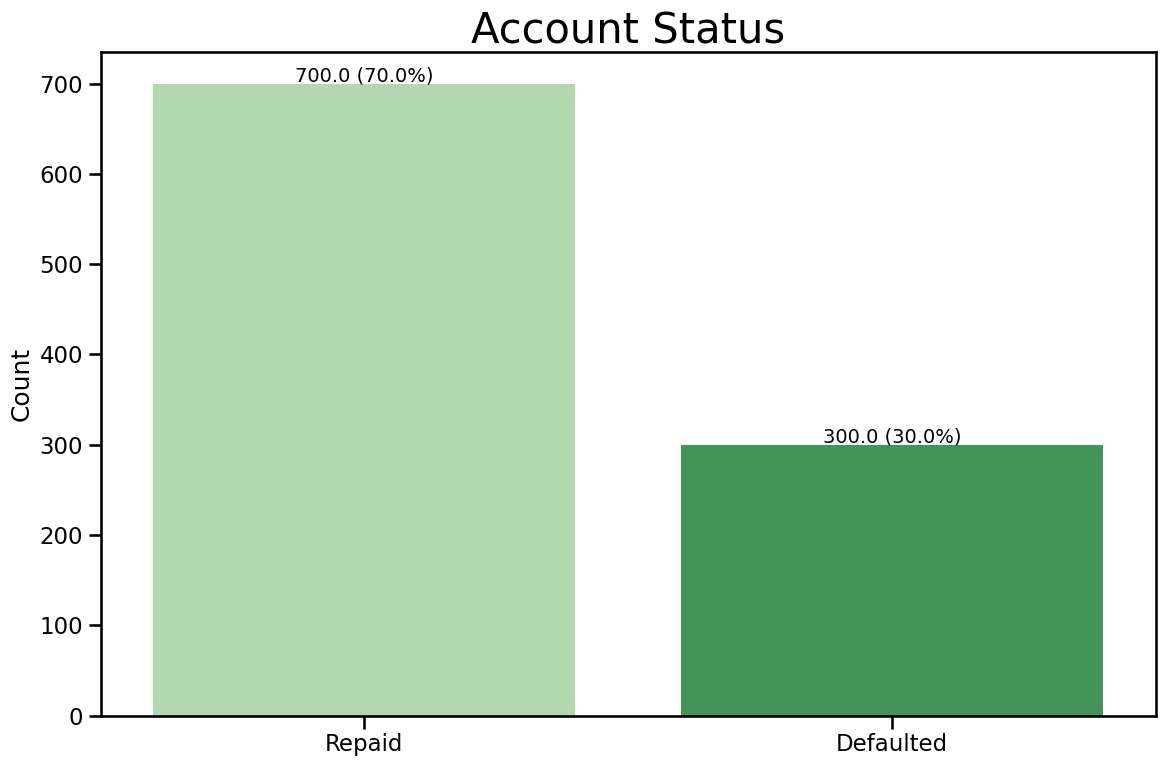

In [7]:
# # Exploratory Data Analysis

 # Count values and percentages
value_counts = df['Repayment_Status'].str.title().value_counts()
percentages = round((value_counts / value_counts.sum()) * 100, 1)

# Plot
plt.figure(figsize=(12, 8))
sns.set_context('talk')

ax = sns.countplot(x="Repayment_Status", data=df, palette='Greens', order=value_counts.index)

# Add count and percentage labels
for p in ax.patches:
    height = p.get_height()
    label = f"{height} ({(height / len(df) * 100):.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 2, label, ha="center", fontsize=14)

# Final touches
plt.title('Account Status', fontsize=30)
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figure 1.0.png')
plt.show()

del [value_counts, percentages, ax, height, label]

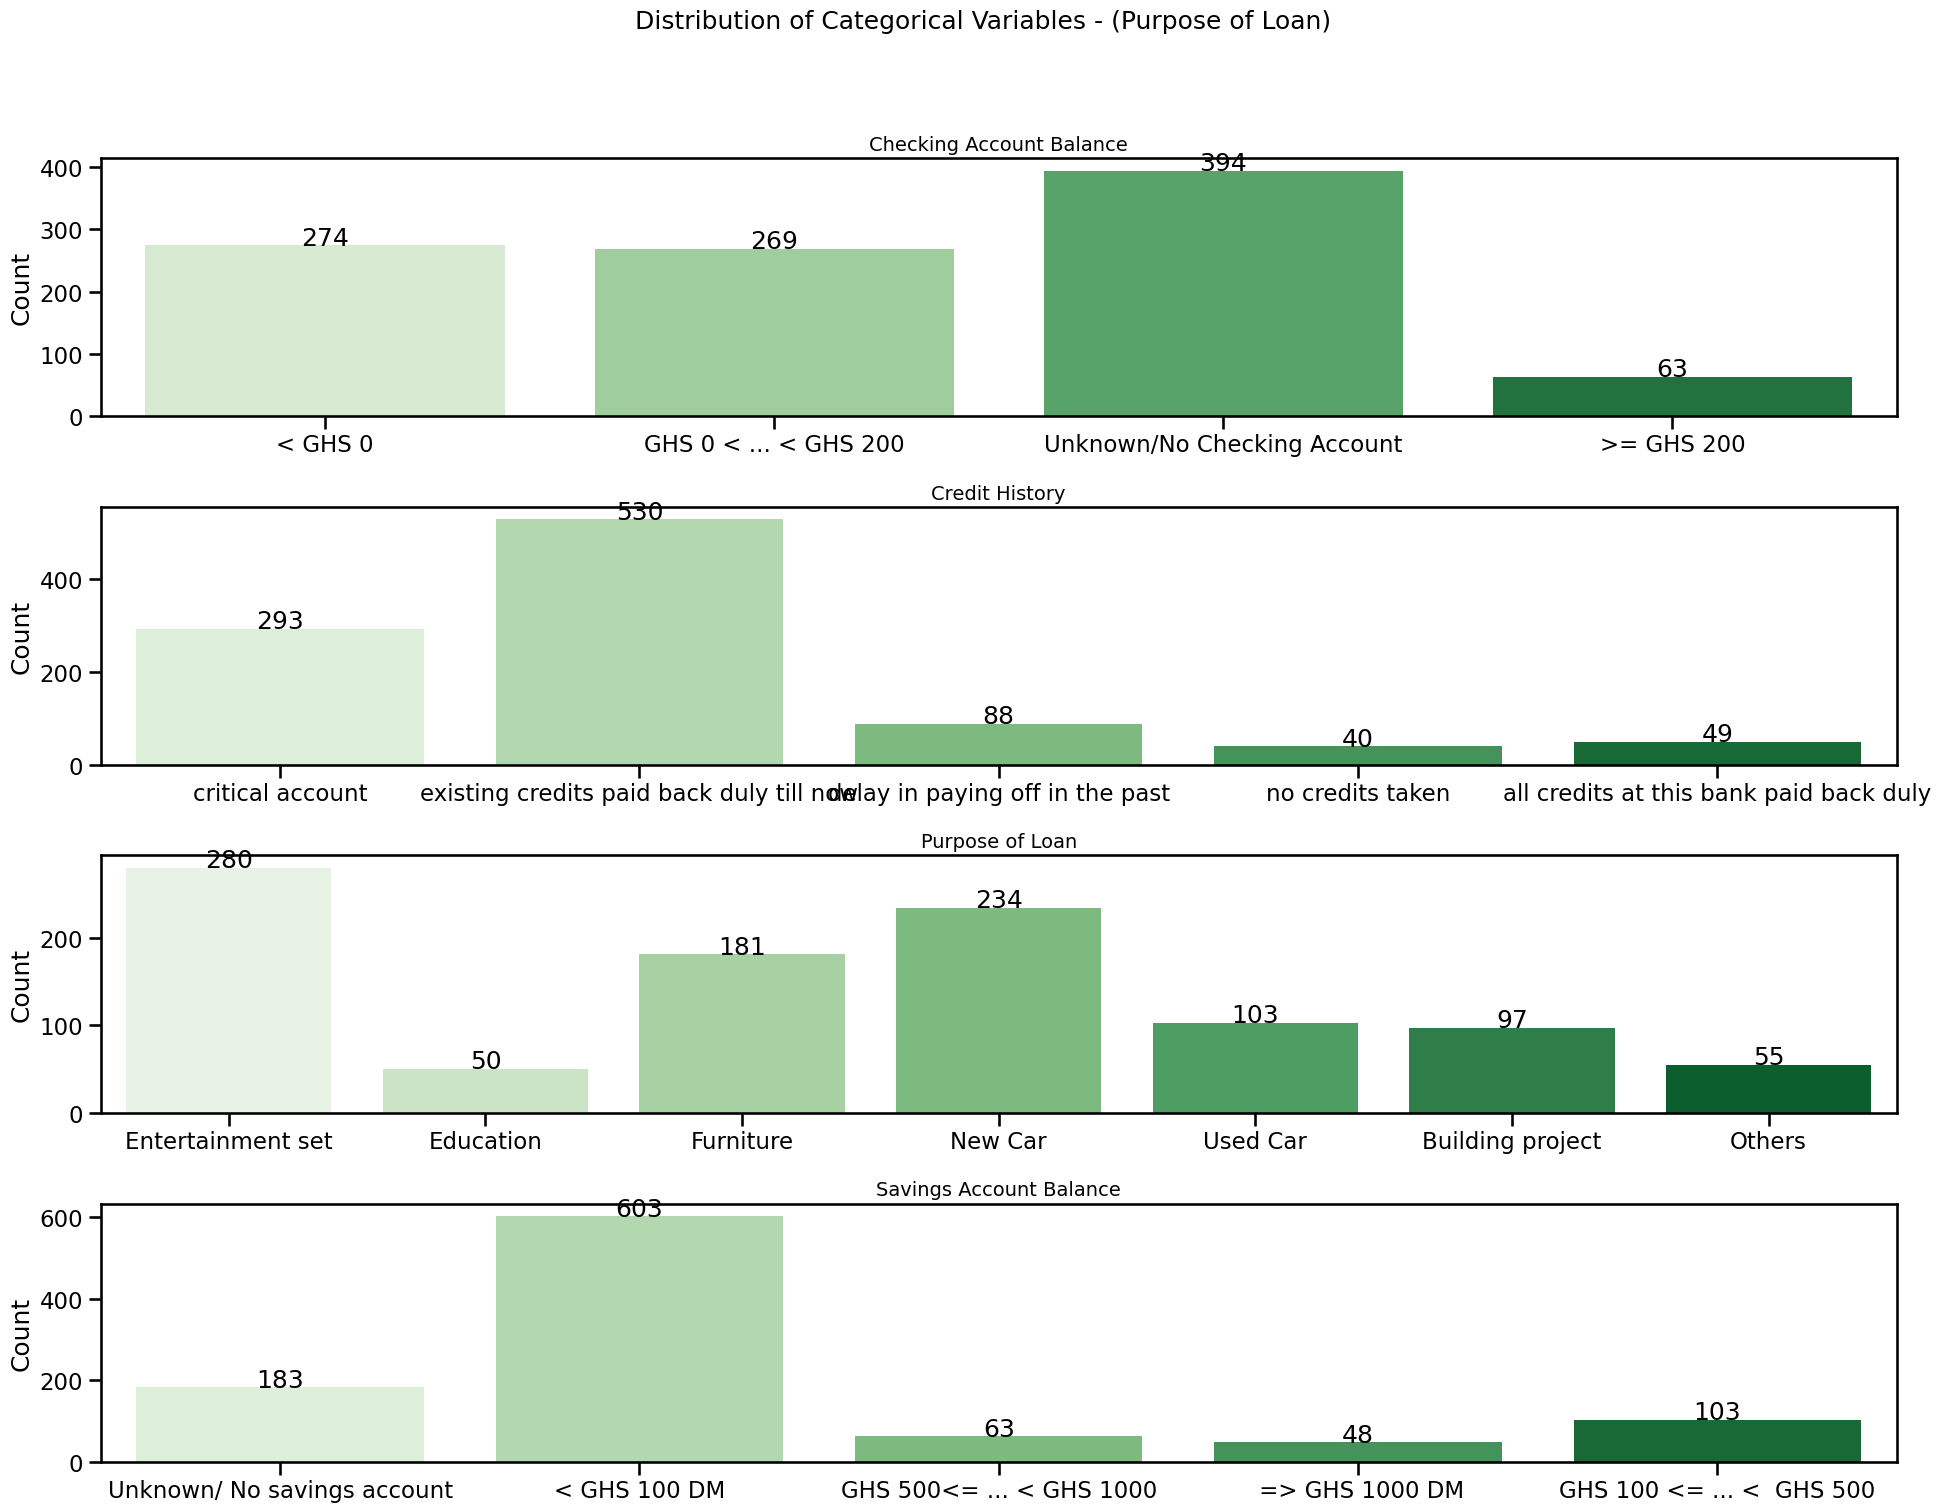

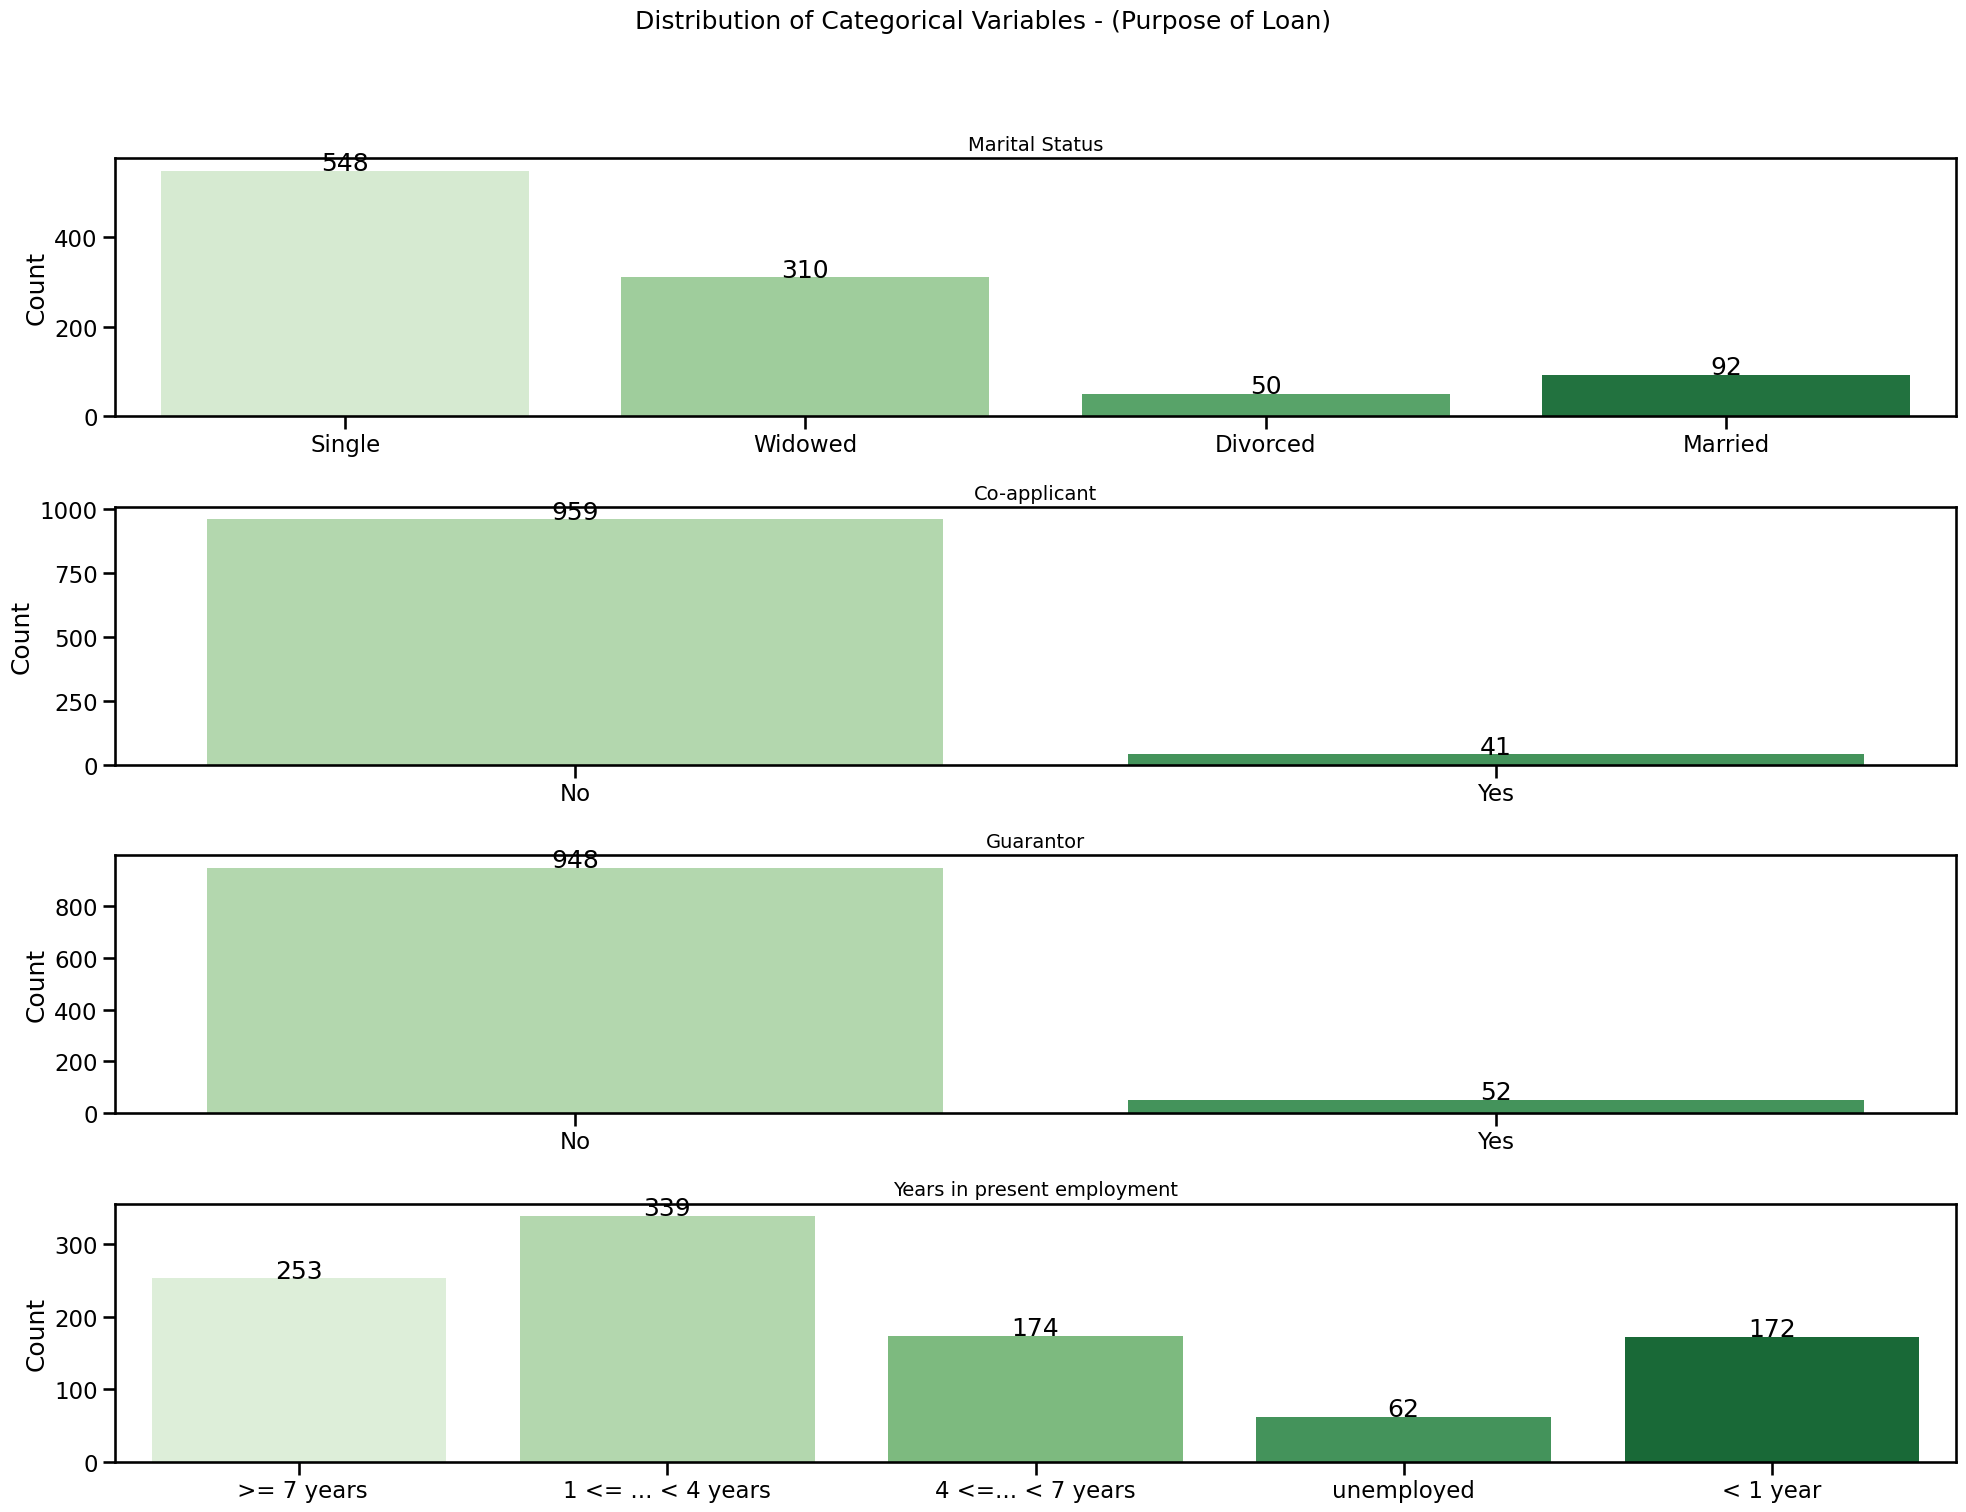

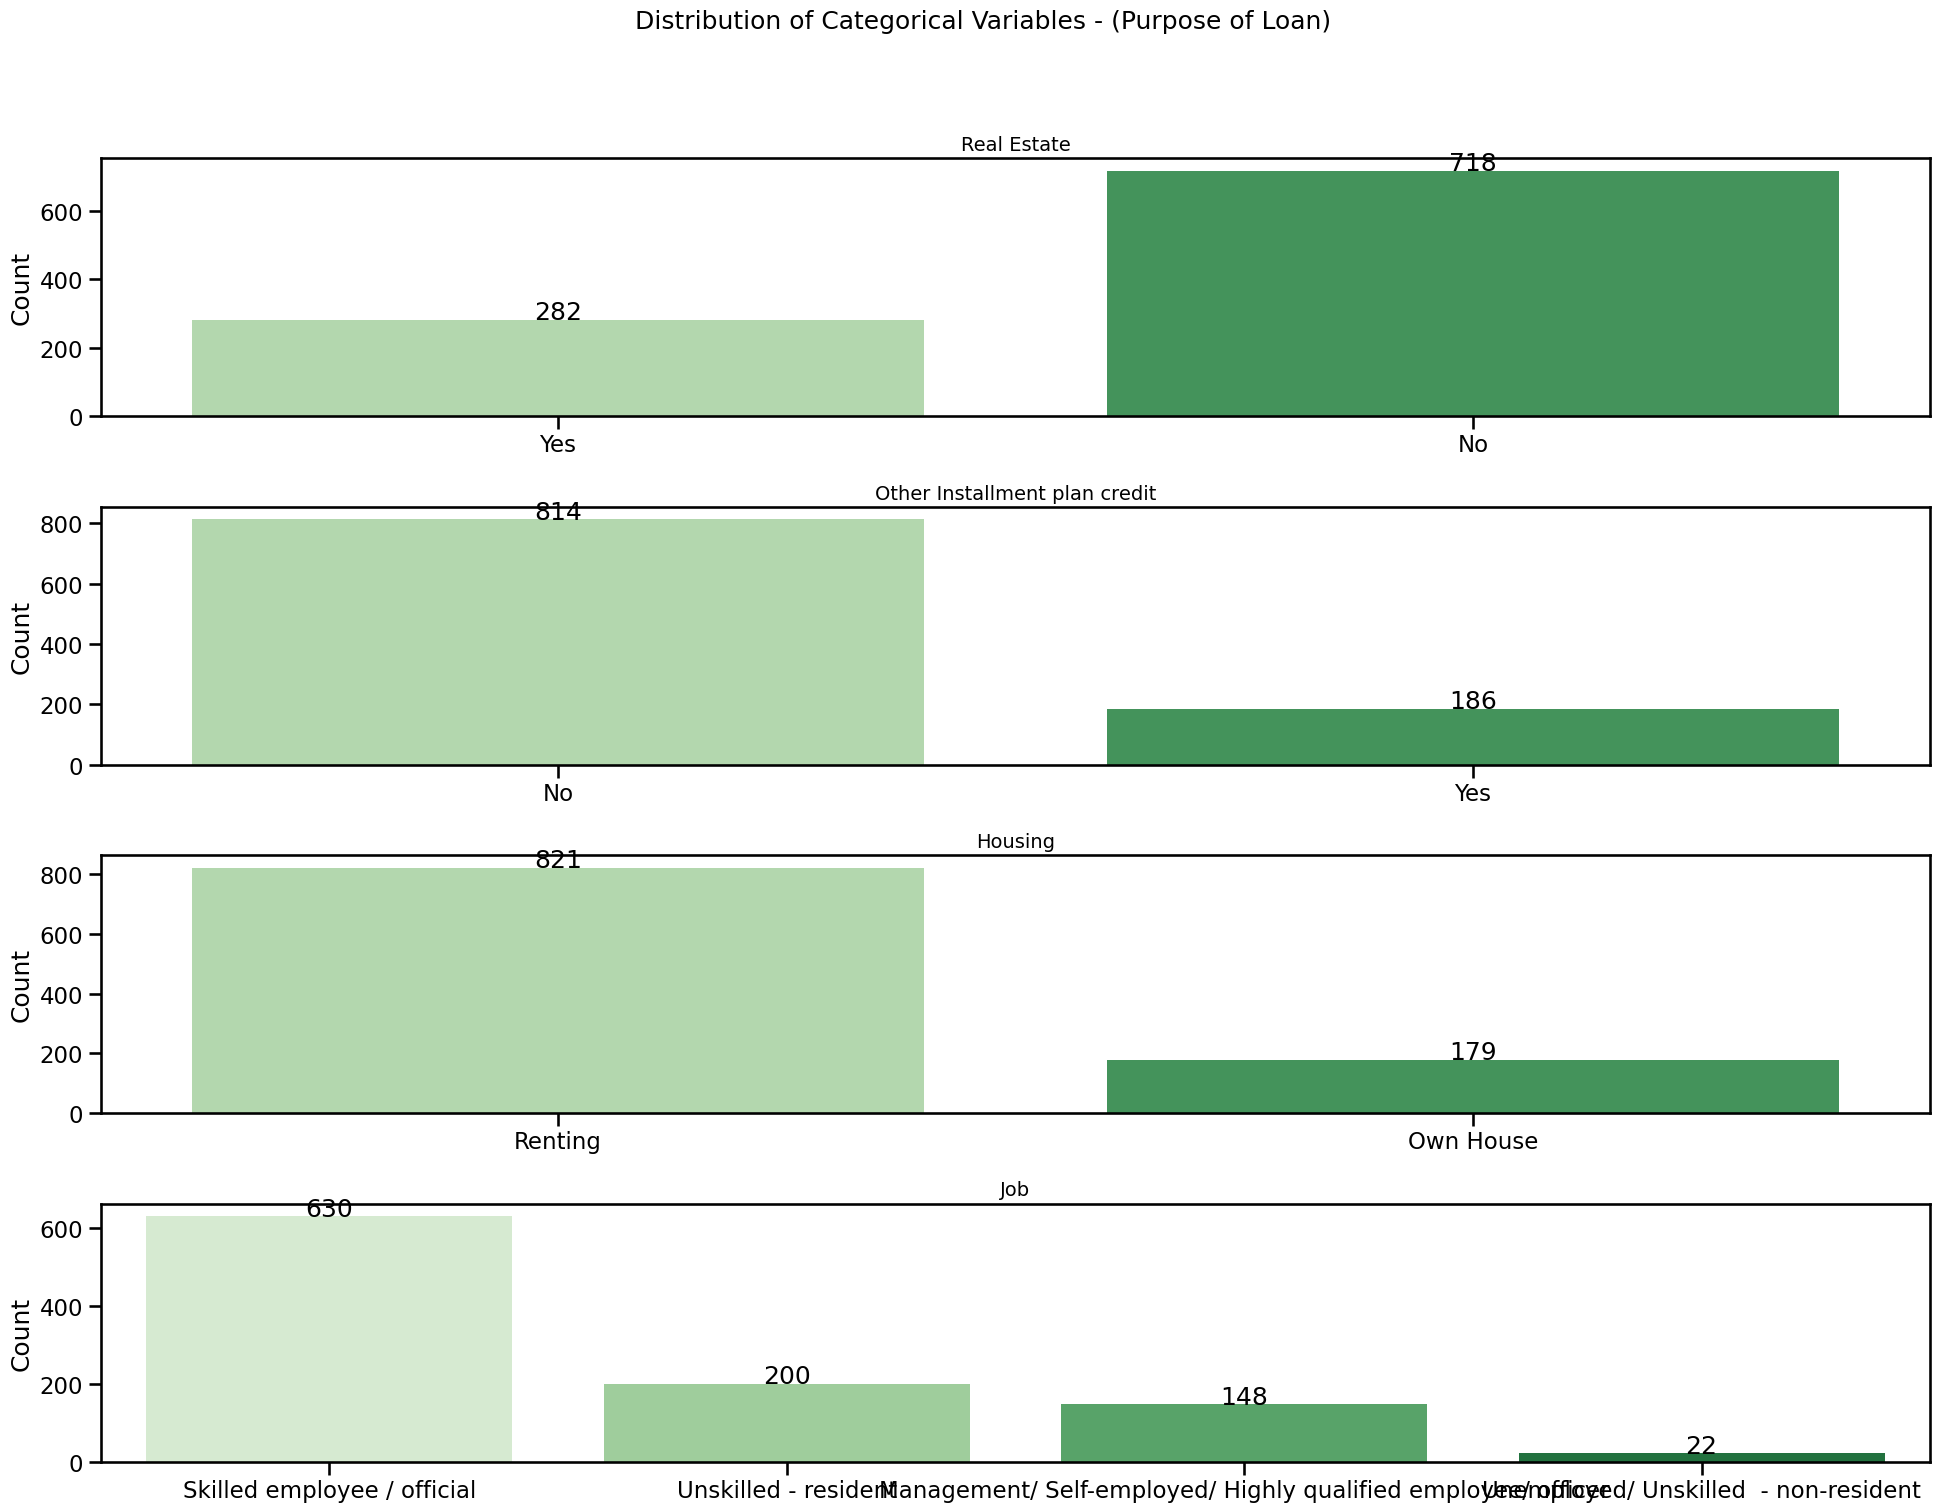

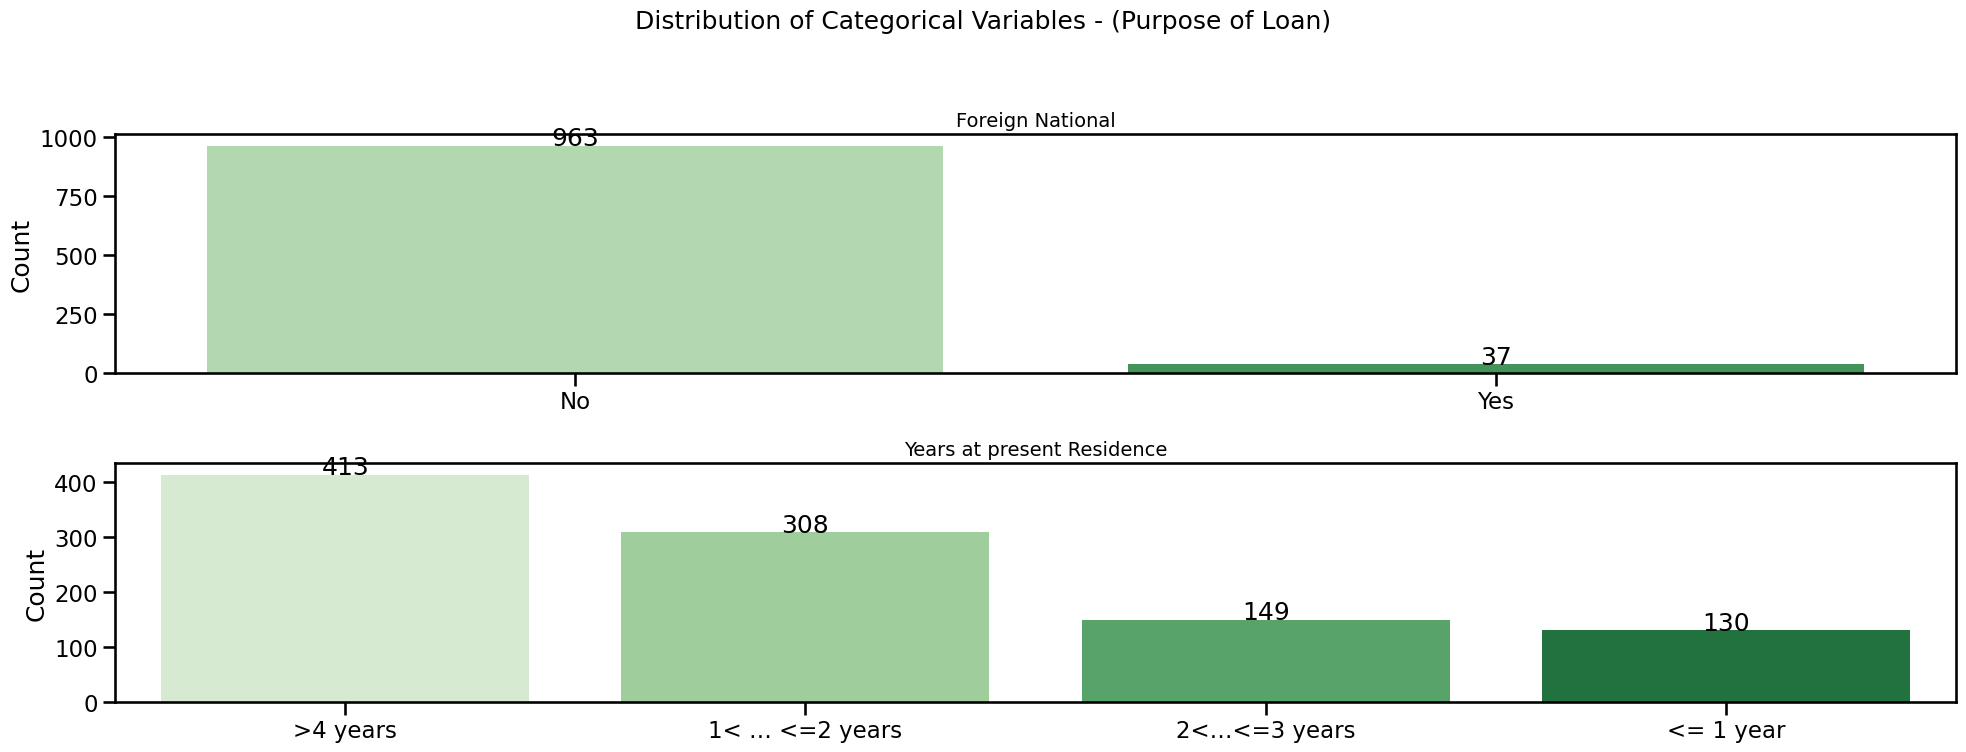

In [8]:
categorical_columns_1 = [
    "Checking Account Balance", "Credit History", "Purpose of Loan", "Savings Account Balance"
]

categorical_columns_2 = [
    "Marital Status", "Co-applicant", "Guarantor", "Years in present employment"
]

categorical_columns_3 = [
     "Real Estate","Other Installment plan credit", "Housing", "Job"
]

categorical_columns_4 = [
     "Foreign National","Years at present Residence" 
]

plot_categorical_distributions(categorical_variables, categorical_columns_1, 
                               title="Distribution of Categorical Variables - (Purpose of Loan)", 
                               filename="figure_1.1.png")


plot_categorical_distributions(categorical_variables, categorical_columns_2, 
                               title="Distribution of Categorical Variables - (Purpose of Loan)", 
                               filename="figure_1.2.png")

plot_categorical_distributions(categorical_variables, categorical_columns_3, 
                               title="Distribution of Categorical Variables - (Purpose of Loan)", 
                               filename="figure_1.3.png")

plot_categorical_distributions(categorical_variables, categorical_columns_4, 
                               title="Distribution of Categorical Variables - (Purpose of Loan)", 
                               filename="figure_1.4.png")

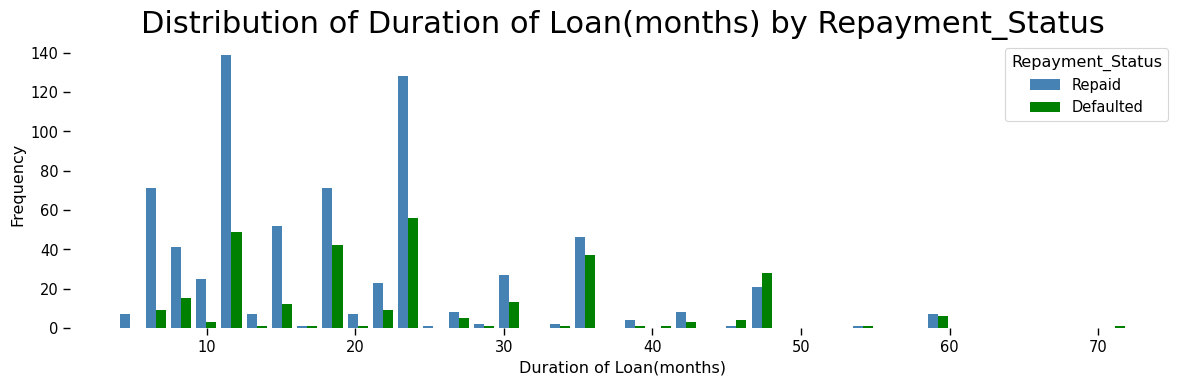

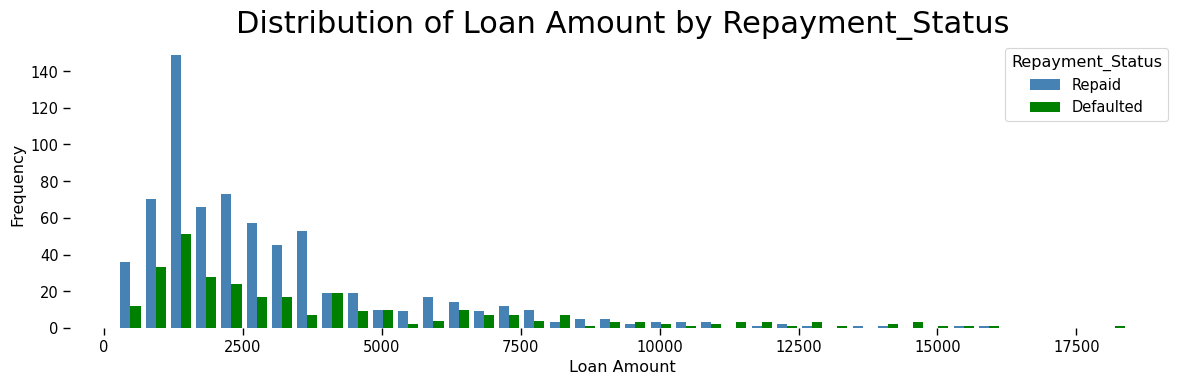

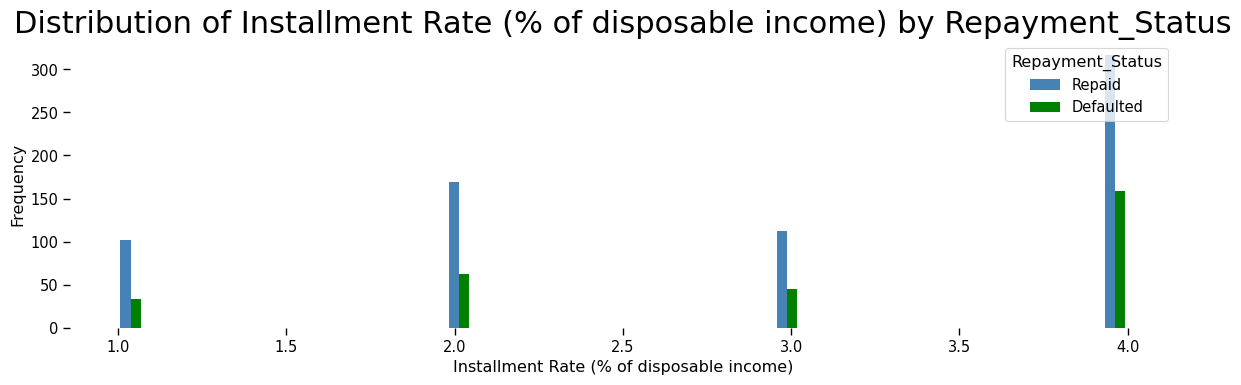

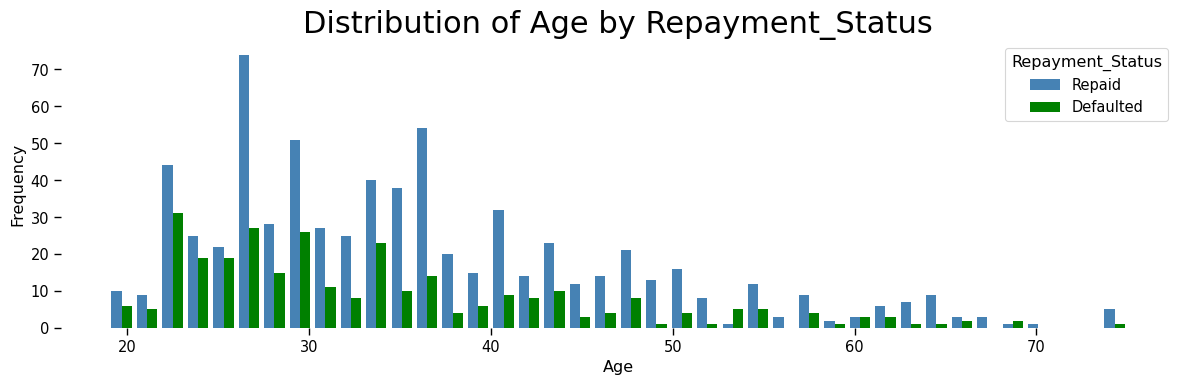

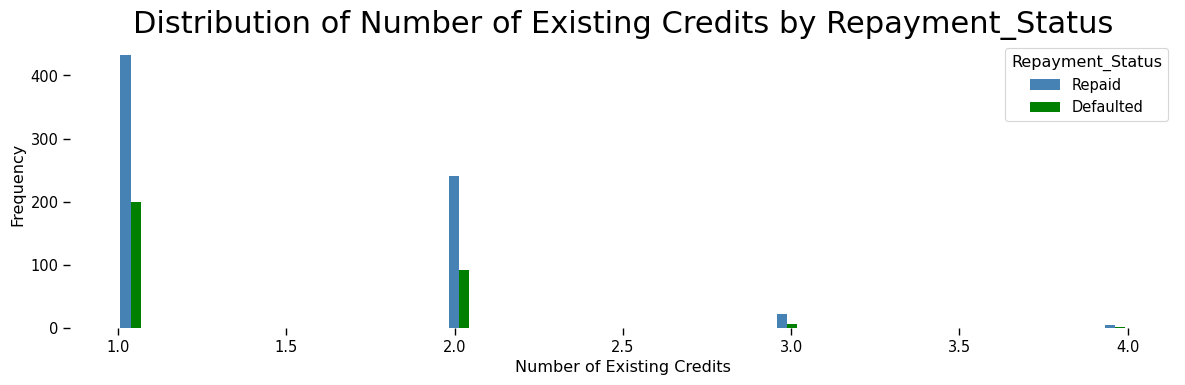

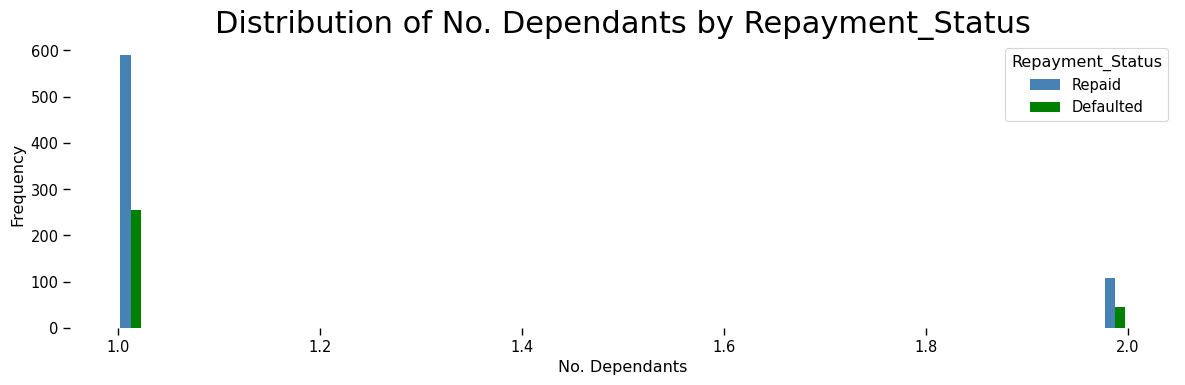

In [9]:
plot_numerical_distributions_by_category(df, numerical_variables, 'Repayment_Status', ['Repaid', 'Defaulted'] )

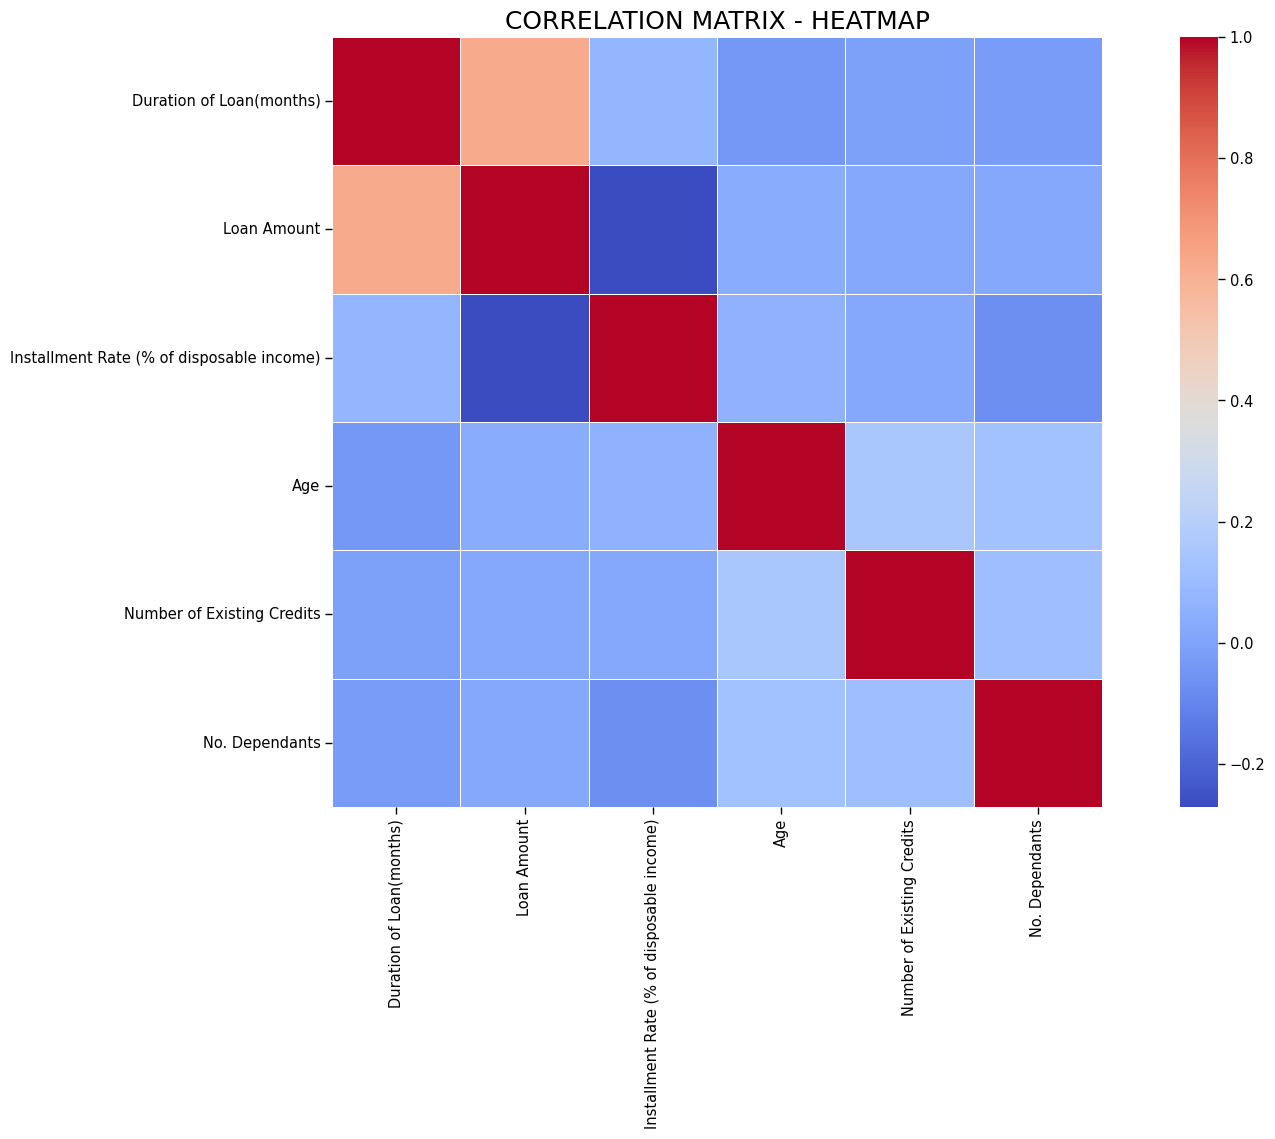

In [10]:
correlation = numerical_variables.corr()  # .corr is used to find corelation
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation, cbar=True, square=True, annot=False, fmt='.1f',
            xticklabels=True, yticklabels=True
            , cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)
plt.savefig('figure_1.5.png')
# %% Drop All Potential Colinear variables
# Ideal work around: Use the variables to derive a single representative.
# Average would be ideal for most of the transaction statistics


In [11]:

for col in categorical_variables:
    cross = pd.crosstab(categorical_variables[col], df['Repayment_Status'])
    # Chi-square Test for Sex and Defaut Status

    # Crosstab
    print(cross)

    cross = np.array(cross)

    chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross)

    print('=== Chi2 Statistic===')
    print(chi2_stat)
    print('\n')

    print('=== Degree of Freedom===')
    print(dof)
    print('\n')

    print('===P-value===')
    print(p_val)
    print('\n')

    print('=== Contigency Table===')
    print(ex)
del [chi2_stat, p_val, dof, ex, cross, col]

Repayment_Status             Defaulted  Repaid
Checking Account Balance                      
< GHS 0                            135     139
>= GHS 200                          14      49
GHS 0 < ... < GHS 200              105     164
Unknown/No Checking Account         46     348
=== Chi2 Statistic===
123.7209435162656


=== Degree of Freedom===
3


===P-value===
1.218902072289376e-26


=== Contigency Table===
[[ 82.2 191.8]
 [ 18.9  44.1]
 [ 80.7 188.3]
 [118.2 275.8]]
Repayment_Status                          Defaulted  Repaid
Credit History                                             
all credits at this bank paid back duly          28      21
critical account                                 50     243
delay in paying off in the past                  28      60
existing credits paid back duly till now        169     361
no credits taken                                 25      15
=== Chi2 Statistic===
61.691396964595505


=== Degree of Freedom===
4


===P-value===
1.2791872956750962

In [254]:
df.drop(["Co-applicant", "Guarantor", "Job", 
"Years at present Residence"], axis = 1, inplace = True)
categorical_variables.drop(["Co-applicant", "Guarantor", "Job", 
"Years at present Residence"], axis = 1, inplace = True)

/var/folders/y6/tgf4xz2x24l8xqlcxk27h5k40000gn/T/ipykernel_42784/3853838154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_variables.drop(["Co-applicant", "Guarantor", "Job",


In [12]:
for i in numerical_variables:
    x1 = list(df[df['Repayment_Status'] == "Repaid"][i])
    x2 = list(df[df['Repayment_Status'] == "Defaulted"][i])

    t_statistic, p_value = ttest_ind(x1, x2)

    print('===Test Results for ' + i + ' ====')
    print('Test Statistics: {:.3f}'.format(t_statistic))
    print('P_value: {:.3f}'.format(p_value))

del [x1, x2, i, t_statistic, p_value]

===Test Results for Duration of Loan(months) ====
Test Statistics: -6.952
P_value: 0.000
===Test Results for Loan Amount ====
Test Statistics: -4.949
P_value: 0.000
===Test Results for Installment Rate (% of disposable income) ====
Test Statistics: -2.293
P_value: 0.022
===Test Results for Age ====
Test Statistics: 2.923
P_value: 0.004
===Test Results for Number of Existing Credits ====
Test Statistics: 1.446
P_value: 0.148
===Test Results for No. Dependants ====
Test Statistics: 0.095
P_value: 0.924


In [256]:
df.drop(["Number of Existing Credits", 
"No. Dependants"], axis = 1, inplace = True)
numerical_variables.drop(["Number of Existing Credits", 
"No. Dependants"], axis = 1, inplace = True)

/var/folders/y6/tgf4xz2x24l8xqlcxk27h5k40000gn/T/ipykernel_42784/1684597409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_variables.drop(["Number of Existing Credits",


In [13]:
df_logreg = df.copy()

for i in categorical_variables:
    dummy = pd.get_dummies(df_logreg[i], prefix=i)
    df_logreg = pd.concat([df_logreg,dummy], axis=1)
    

for i in categorical_variables: 
    df_logreg = df_logreg.drop(i, axis = 1, inplace = False)
    

del[dummy,categorical_variables, i]


In [14]:
#%%
features_logreg = df_logreg.drop(["Repayment_Status"], axis = 1, inplace = False)

target = df_logreg["Repayment_Status"]

X_train, X_test, y_train, y_test = train_test_split(features_logreg,target, test_size = 0.30, 
                                                    stratify = target, random_state = 0)

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)



### Default Data -- Logistic Regression

In [15]:
logreg_vanila = LogisticRegression()
logreg_vanila.fit(X_train, y_train)
y_pred_vanila = logreg_vanila.predict(X_test)
precision_logreg_vanilla = precision_score(y_test, y_pred_vanila, pos_label="Defaulted")
recall_logreg_vanilla = recall_score(y_test, y_pred_vanila, pos_label="Defaulted")
f1_logreg_vanilla = f1_score(y_test, y_pred_vanila,pos_label="Defaulted")
print('Training Score: {:.2f}'.format(logreg_vanila.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(logreg_vanila.score(X_test, y_test)))
print('Precision: {:.2f}'.format(precision_logreg_vanilla))
print("Recall: {:.2f}".format(recall_logreg_vanilla))
print("F1 Score: {:.2f}".format(f1_logreg_vanilla))

Training Score: 0.70
Test Score: 0.70
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [16]:
evaluate_model_with_cv(
    model=logreg_vanila,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_vanila,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_2_0.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_vanila,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure_2_1.png'
)

Confusion matrix saved to: figure_2_1.png


### Hyper-parameterisation -- Logistic Regression on Default Data

In [17]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GRIDSEARCH object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, n_iter= 200, random_state=43, n_jobs= -1)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Parameter Search for Vanila Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search

Tuned Logistic Regression Parameters: {'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'class_weight': None, 'C': 1}
Best cross-validation score: 0.75


/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algori

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065935,0.014380,0.003659,0.003682,0.0001,newton-cg,l2,500,balanced,1000.0000,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.642857,0.628571,0.750000,0.700000,0.628571,0.670000,0.047894,29
1,0.000847,0.000408,0.000000,0.000000,0.0100,lbfgs,l1,400,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
2,0.001426,0.000448,0.000000,0.000000,0.0100,lbfgs,l1,100,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
3,0.010256,0.007320,0.002579,0.002194,0.0001,lbfgs,l2,400,balanced,0.0010,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': ...",0.492857,0.478571,0.514286,0.514286,0.464286,0.492857,0.019691,34
4,0.003045,0.001796,0.000865,0.000073,0.0010,liblinear,l2,200,None,0.0001,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.000000,9


### Tuned Logistic Regression Model based on best parameters from Hyper parameterisation

In [18]:
logreg_tuned = LogisticRegression(**logreg_cv.best_params_)
logreg_tuned.fit(X_train, y_train)
y_pred_tuned = logreg_tuned.predict(X_test)
precision_logreg_tuned = precision_score(y_test, y_pred_tuned,pos_label="Defaulted")
recall_logreg_tuned = recall_score(y_test, y_pred_tuned,pos_label="Defaulted")
f1_logreg_tuned = f1_score(y_test, y_pred_tuned,pos_label="Defaulted")
print('Training Score: {:.2f}'.format(logreg_tuned.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(logreg_tuned.score(X_test, y_test)))
print('Precision: {:.2f}'.format(precision_logreg_tuned))
print("Recall: {:.2f}".format(recall_logreg_tuned))
print("F1 Score: {:.2f}".format(f1_logreg_tuned))

Training Score: 0.78
Test Score: 0.79
Precision: 0.71
Recall: 0.50
F1 Score: 0.59


In [19]:
evaluate_model_with_cv(
    model=logreg_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_tuned,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_2_2.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_2_3.png'
)

Confusion matrix saved to: figure_2_3.png


### Balance Data Set --  Vanilla Logistic Regression

In [20]:
logreg_balanced = LogisticRegression()
logreg_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_logreg_balanced = logreg_balanced.predict(X_test)
precision_logreg_balanced = precision_score(y_test, y_pred_logreg_balanced, pos_label="Defaulted")
recall_logreg_balanced = recall_score(y_test, y_pred_logreg_balanced, pos_label="Defaulted")
f1_logreg_balanced = f1_score(y_test, y_pred_logreg_balanced, pos_label="Defaulted")
print('Training Score: {:.2f}'.format(logreg_balanced.score(X_train_balanced, y_train_balanced)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_logreg_balanced, y_test)))
print('Precision: {:.2f}'.format(precision_logreg_balanced))
print('Recall: {:.2f}'.format(recall_logreg_balanced))
print('F1 Score: {:.2f}'.format(f1_logreg_balanced))

Training Score: 0.54
Test Accuracy: 0.52
Precision: 0.35
Recall: 0.71
F1 Score: 0.47


In [21]:
evaluate_model_with_cv(
    model=logreg_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_logreg_balanced,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_2_4.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_logreg_balanced,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_2_5.png'
)

Confusion matrix saved to: figure_2_5.png


In [22]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GRIDSEARCH object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, n_iter= 200, random_state=43, n_jobs= -1)

# Fit it to the data
logreg_cv.fit(X_train_balanced, y_train_balanced)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Parameter Search for Balanced Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.

Tuned Logistic Regression Parameters: {'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'class_weight': None, 'C': 100}
Best cross-validation score: 0.79


/Users/sumailaali/Desktop/Loan Model/venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.4387112561554662. Increase the number of iterations.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.229221,0.029134,0.008955,0.011751,0.0001,newton-cg,l2,500,balanced,1000.0000,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.520408,0.663265,0.877551,0.790816,0.846939,0.739796,0.131945,11
1,0.006910,0.002944,0.000000,0.000000,0.0100,lbfgs,l1,400,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
2,0.005438,0.002828,0.000000,0.000000,0.0100,lbfgs,l1,100,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
3,0.015648,0.006761,0.002599,0.002161,0.0001,lbfgs,l2,400,balanced,0.0010,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': ...",0.530612,0.500000,0.520408,0.576531,0.551020,0.535714,0.026215,16
4,0.007215,0.002387,0.008367,0.012622,0.0010,liblinear,l2,200,None,0.0001,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,32


In [23]:
logreg_balanced_tuned = LogisticRegression(**logreg_cv.best_params_)
logreg_balanced_tuned.fit(X_train_balanced, y_train_balanced)
y_pred_balanced_tuned = logreg_balanced_tuned.predict(X_test)
precision_logreg_balanced_tuned = precision_score(y_test, y_pred_balanced_tuned,pos_label="Defaulted")
recall_logreg_balanced_tuned = recall_score(y_test, y_pred_balanced_tuned,pos_label="Defaulted")
f1_logreg_balanced_tuned = f1_score(y_test, y_pred_balanced_tuned,pos_label="Defaulted")
print('Training Score: {:.2f}'.format(logreg_tuned.score(X_train_balanced, y_train_balanced)))
print('Test Score: {:.2f}'.format(logreg_tuned.score(X_test, y_test)))
print('Precision: {:.2f}'.format(precision_logreg_balanced_tuned))
print("Recall: {:.2f}".format(recall_logreg_balanced_tuned))
print("F1 Score: {:.2f}".format(f1_logreg_balanced_tuned))

Training Score: 0.73
Test Score: 0.79
Precision: 0.70
Recall: 0.52
F1 Score: 0.60


In [24]:
evaluate_model_with_cv(
    model=logreg_balanced_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_balanced_tuned,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_2_6.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_balanced_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_2_7.png'
)

Confusion matrix saved to: figure_2_7.png


In [25]:
# Initialize the classifier
Decision_tree_vanila = DecisionTreeClassifier(random_state=42)
Decision_tree_balanced = DecisionTreeClassifier(random_state=0)

# Train the classifier
Decision_tree_vanila.fit(X_train, y_train)
Decision_tree_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_dt_vanila = Decision_tree_vanila.predict(X_test)
y_pred_dt_balanced = Decision_tree_balanced.predict(X_test)

Decision_tree_vanila.fit(X_train, y_train)
Decision_tree_balanced.fit(X_train_balanced, y_train_balanced)

precision_dt_vanilla = precision_score(y_test, y_pred_dt_vanila,pos_label="Defaulted")
precision_dt_balanced = precision_score(y_test, y_pred_dt_balanced,pos_label="Defaulted")

recall_dt_vanilla = recall_score(y_test, y_pred_dt_vanila,pos_label="Defaulted")
recall_dt_balanced = recall_score(y_test, y_pred_dt_balanced,pos_label="Defaulted")

f1_dt_vanilla = f1_score(y_test, y_pred_dt_vanila,pos_label="Defaulted")
f1_dt_balanced  = f1_score(y_test, y_pred_dt_balanced,pos_label="Defaulted")

print('Training Score(Vanilla): {:.2f}'.format(Decision_tree_vanila.score(X_train, y_train)))
print('Training Score(Balanced): {:.2f}'.format(Decision_tree_balanced.score(X_train_balanced, y_train_balanced)))
print('Test Score(Vanilla): {:.2f}'.format(Decision_tree_vanila.score(X_test, y_test)))
print('Test Score(Balanced): {:.2f}'.format(Decision_tree_balanced.score(X_test, y_test)))
print('Precision(Vanilla): {:.2f}'.format(precision_dt_vanilla))
print('Precision(Balanced): {:.2f}'.format(precision_dt_balanced))
print("Recall(Vanilla): {:.2f}".format(recall_dt_vanilla))
print("Recall(Balanced): {:.2f}".format(recall_dt_balanced))
print("F1 Score(Vanilla): {:.2f}".format(f1_dt_vanilla))
print("F1 Score(Balanced): {:.2f}".format(f1_dt_balanced))

Training Score(Vanilla): 1.00
Training Score(Balanced): 1.00
Test Score(Vanilla): 0.64
Test Score(Balanced): 0.71
Precision(Vanilla): 0.40
Precision(Balanced): 0.51
Recall(Vanilla): 0.40
Recall(Balanced): 0.58
F1 Score(Vanilla): 0.40
F1 Score(Balanced): 0.54


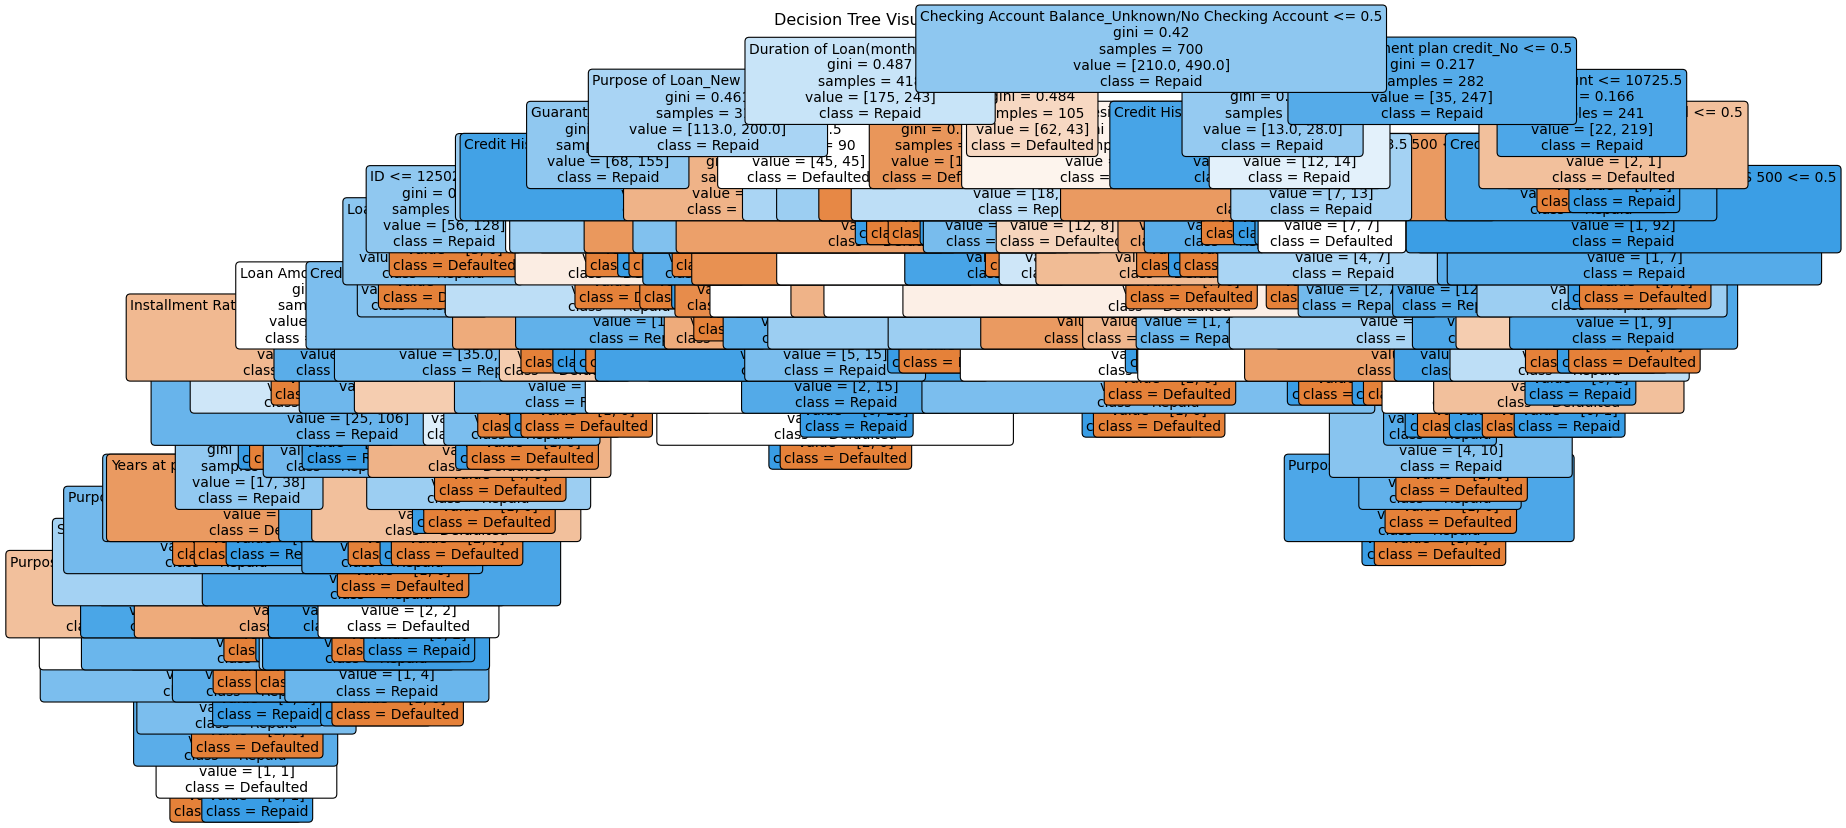

In [26]:
feature_names = X_train.columns.tolist()                     # For input features
class_names = Decision_tree_vanila.classes_.astype(str) 
visualize_decision_tree(Decision_tree_vanila, feature_names=feature_names, class_names=class_names, image_file="figure_3_1.png")

In [27]:
evaluate_model_with_cv(
    model=Decision_tree_vanila,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_dt_vanila,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_3_2.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_dt_vanila,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Decision Tree - Vanilla Dataset",
    image_file='figure_3_3.png'
)

evaluate_model_with_cv(
    model=Decision_tree_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_dt_balanced,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_3_4.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_balanced_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Decision Tree - Balanced Dataset",
    image_file='figure_3_5.png'
)

Confusion matrix saved to: figure_3_3.png
Confusion matrix saved to: figure_3_5.png


### Hyper parameterization -- 

In [28]:
# Define the classifier
Decison_tree_tuned = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20),  # Random integer between 1 and 20
    'criterion': ['gini', 'entropy'],   # Criterion for splitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Decison_tree_tuned,
                                   param_distributions=param_dist,
                                   n_iter=200, cv=5, scoring='accuracy',
                                   random_state=42)


# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Parameter Search for Scaled Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2}
Best cross-validation score: 0.71


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001394,0.000200,0.000893,0.000377,gini,15,log2,8,8,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.707143,0.678571,0.664286,0.657143,0.692857,0.680000,0.018295,58
1,0.001441,0.000236,0.000816,0.000167,entropy,19,log2,11,12,"{'criterion': 'entropy', 'max_depth': 19, 'max...",0.678571,0.714286,0.714286,0.685714,0.657143,0.690000,0.021946,34
2,0.001150,0.000069,0.000628,0.000016,entropy,4,log2,2,13,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.700000,0.700000,0.671429,0.685714,0.700000,0.691429,0.011429,19
3,0.001104,0.000026,0.000595,0.000006,entropy,6,sqrt,1,13,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.621429,0.714286,0.692857,0.700000,0.664286,0.678571,0.032888,68
4,0.000228,0.000014,0.000000,0.000000,entropy,12,auto,17,11,"{'criterion': 'entropy', 'max_depth': 12, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,128


In [29]:
# Initialize the classifier
Decision_tree_vanila_tuned = DecisionTreeClassifier(**random_search.best_params_, random_state=0)

# Train the classifier
Decision_tree_vanila_tuned.fit(X_train, y_train)

# Make predictions
y_pred_dt_vanila_tuned = Decision_tree_vanila_tuned.predict(X_test)

# Evaluate the model
precision_dt_vanilla_tuned = precision_score(y_test, y_pred_dt_vanila_tuned,pos_label="Defaulted")
recall_dt_vanilla_tuned = recall_score(y_test, y_pred_dt_vanila_tuned,pos_label="Defaulted")
f1_dt_vanilla_tuned = f1_score(y_test, y_pred_dt_vanila_tuned,pos_label="Defaulted")

print('Training Score: {:.2f}'.format(Decision_tree_vanila_tuned.score(X_train, y_train)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_dt_vanila_tuned, y_test)))
print('Precision: {:.2f}'.format(precision_dt_vanilla_tuned))
print("Recall: {:.2f}".format(recall_dt_vanilla_tuned))
print("F1 Score: {:.2f}".format(f1_dt_vanilla_tuned))


Training Score: 0.80
Test Accuracy: 0.72
Precision: 0.55
Recall: 0.42
F1 Score: 0.48


In [30]:
evaluate_model_with_cv(
    model=Decision_tree_vanila_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_dt_vanila_tuned,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_3_6.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_dt_vanila_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - DT Tuned - Vanilla Dataset",
    image_file='figure_3_7.png'
)

Confusion matrix saved to: figure_3_7.png


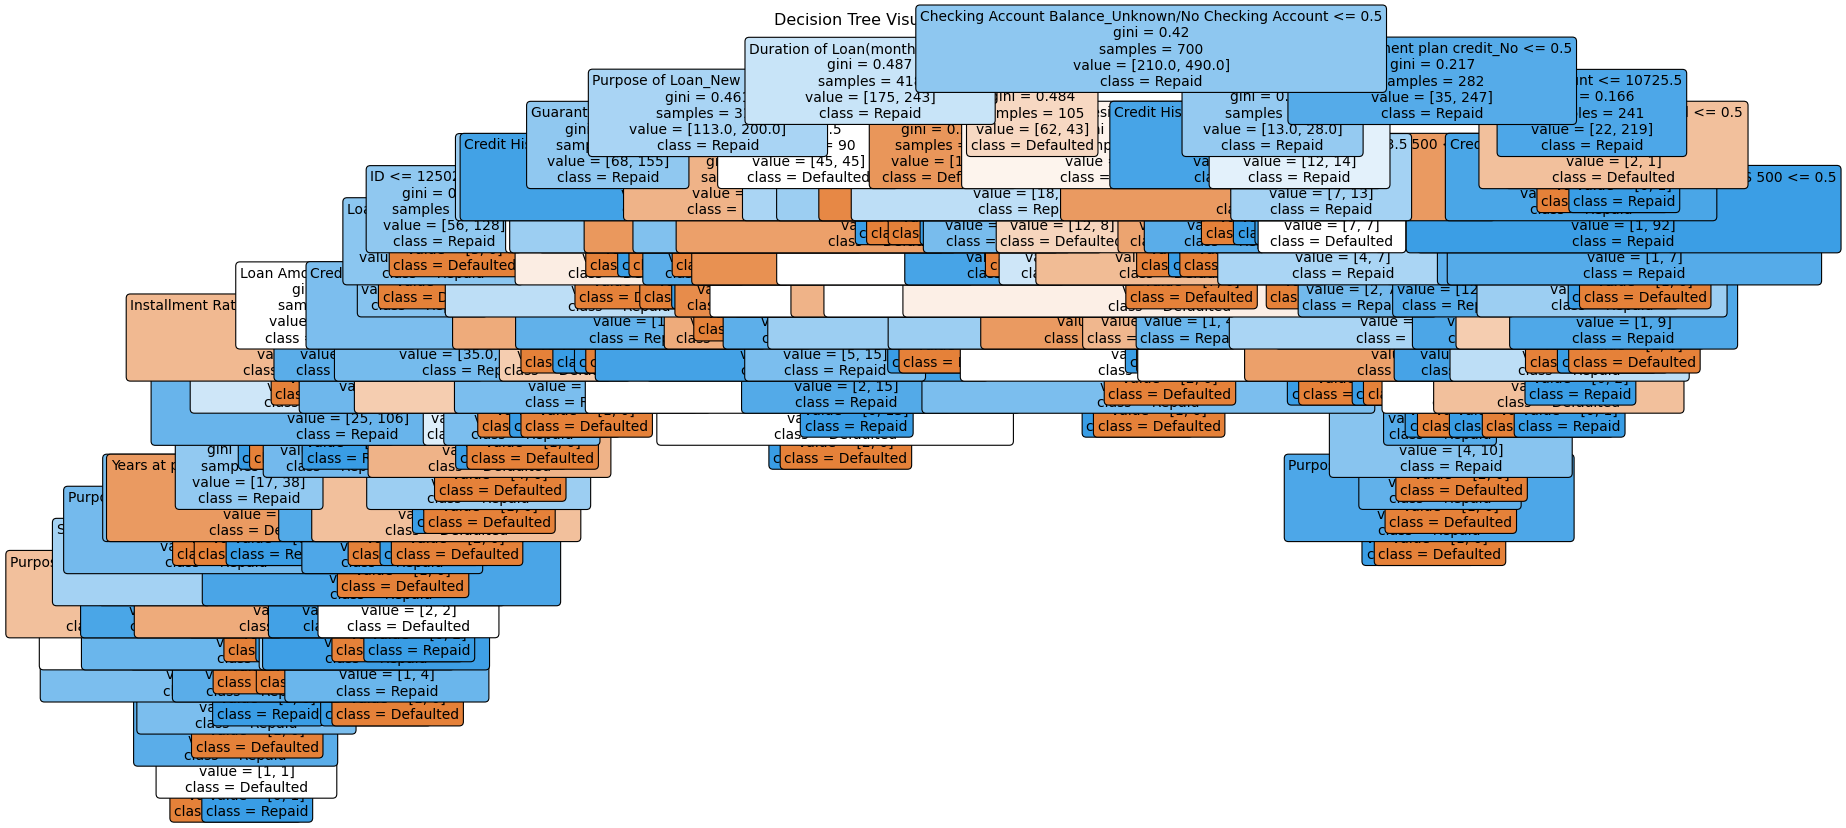

In [31]:
feature_names = X_train.columns.tolist()                     # For input features
class_names = Decision_tree_vanila.classes_.astype(str) 
visualize_decision_tree(Decision_tree_vanila, feature_names=feature_names, class_names=class_names, image_file="figure_3_8.png")

In [32]:
# Define the classifier
Decison_tree_tuned = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20),  # Random integer between 1 and 20
    'criterion': ['gini', 'entropy'],   # Criterion for splitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Decison_tree_tuned,
                                   param_distributions=param_dist,
                                   n_iter=200, cv=5, scoring='accuracy',
                                   random_state=42)


# Perform RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)


# Print the tuned parameters and score
# TODO Change the strings describing the data.
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Parameter Search for Scaled Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8}
Best cross-validation score: 0.75


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003554,0.000973,0.001350,0.000147,gini,15,log2,8,8,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.586735,0.632653,0.801020,0.811224,0.795918,0.725510,0.095799,30
1,0.003258,0.000429,0.001601,0.000389,entropy,19,log2,11,12,"{'criterion': 'entropy', 'max_depth': 19, 'max...",0.586735,0.617347,0.821429,0.744898,0.826531,0.719388,0.100550,54
2,0.002526,0.000231,0.001297,0.000291,entropy,4,log2,2,13,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.622449,0.668367,0.801020,0.678571,0.785714,0.711224,0.069851,76
3,0.002632,0.000227,0.001415,0.000323,entropy,6,sqrt,1,13,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.591837,0.607143,0.811224,0.719388,0.780612,0.702041,0.088934,108
4,0.000936,0.000132,0.000000,0.000000,entropy,12,auto,17,11,"{'criterion': 'entropy', 'max_depth': 12, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,128


In [34]:
# Initialize the classifier
Decision_tree_balanced_tuned = DecisionTreeClassifier(**random_search.best_params_)

# Train the classifier
Decision_tree_balanced_tuned.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_dt_balanced_tuned = Decision_tree_balanced_tuned.predict(X_test)

# Evaluate the model

precision_dt_balanced_tuned = precision_score(y_test, y_pred_dt_balanced_tuned,pos_label="Defaulted")
recall_dt_balanced_tuned = recall_score(y_test, y_pred_dt_balanced_tuned,pos_label="Defaulted")
f1_dt_balanced_tuned = f1_score(y_test, y_pred_dt_balanced_tuned,pos_label="Defaulted")

print('Training Score: {:.2f}'.format(Decision_tree_balanced_tuned.score(X_train, y_train)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_dt_vanila_tuned, y_test)))
print('Precision: {:.2f}'.format(precision_dt_balanced_tuned))
print("Recall: {:.2f}".format(recall_dt_balanced_tuned))
print("F1 Score: {:.2f}".format(f1_dt_balanced_tuned))
 

Training Score: 0.70
Test Accuracy: 0.72
Precision: 0.44
Recall: 0.70
F1 Score: 0.54


In [35]:
evaluate_model_with_cv(
    model=Decision_tree_balanced_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_dt_balanced_tuned,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_3_9.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_dt_balanced_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - DT Tuned Decision Tree",
    image_file='figure_3_10.png'
)

Confusion matrix saved to: figure_3_10.png


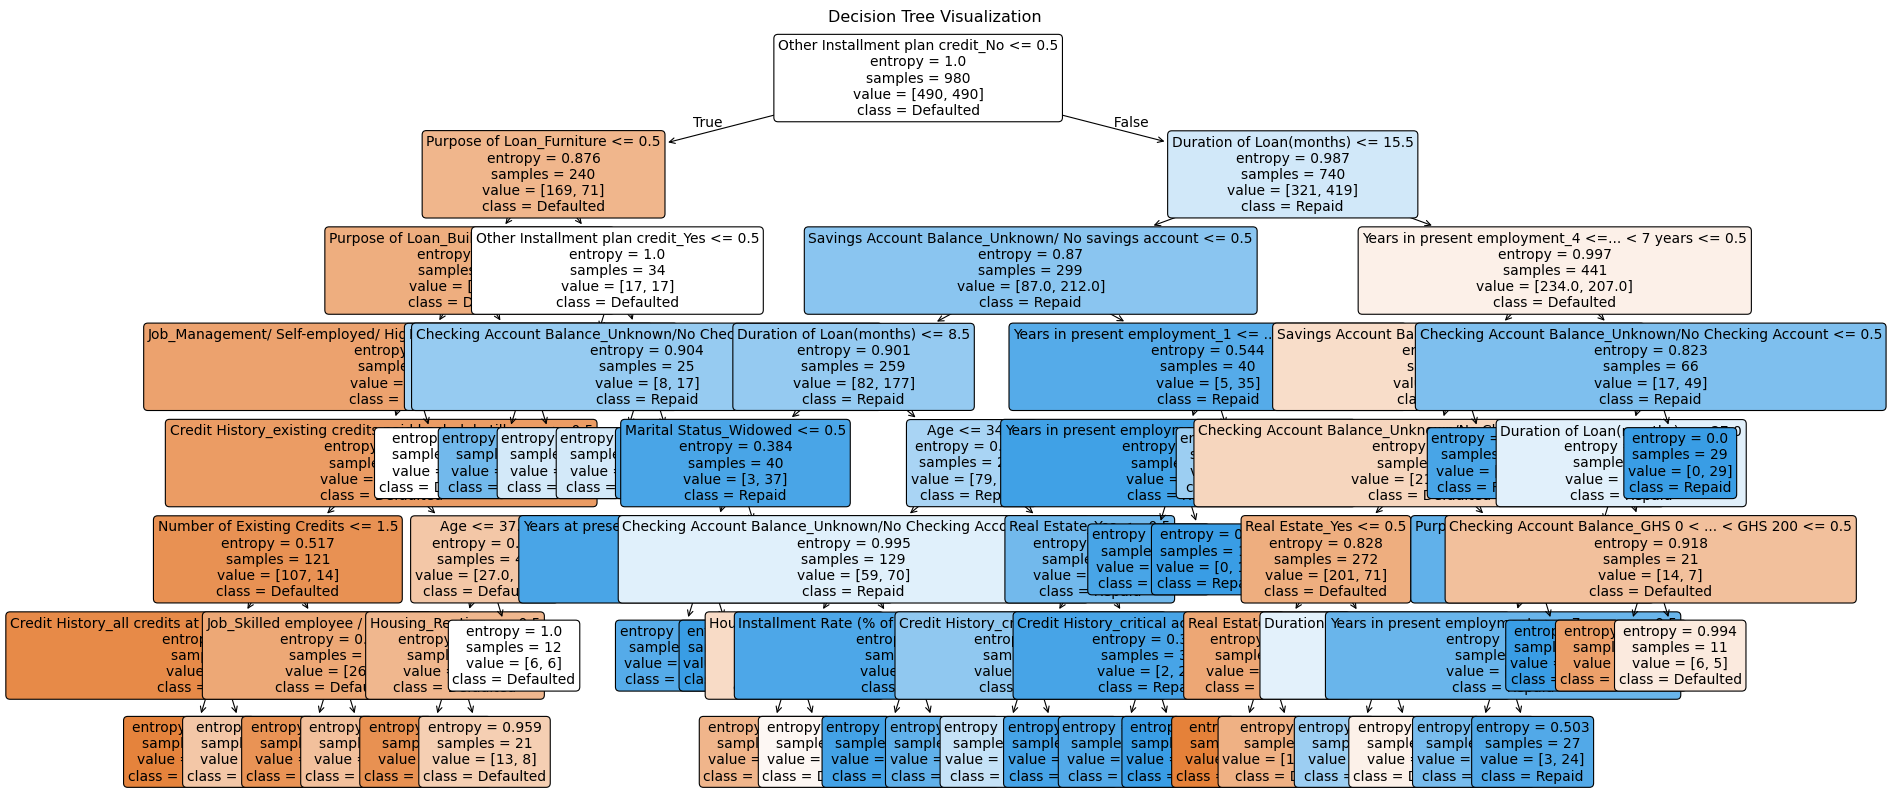

In [36]:
feature_names = X_train.columns.tolist()                     # For input features
class_names = Decision_tree_balanced_tuned.classes_.astype(str) 
visualize_decision_tree(Decision_tree_balanced_tuned, feature_names=feature_names, class_names=class_names, image_file="figure_3_11.png")

In [ ]:
#TODO Check to see if you can 
# add a view for the significant features. 

#### Random Forest With Default Parameters

In [53]:
rf_vanila = RandomForestClassifier()
rf_vanila.fit(X_train,y_train)
y_pred_rf_vanila = rf_vanila.predict(X_test)

precision_dt_balanced_tuned = precision_score(y_test, y_pred_rf_vanila,pos_label="Defaulted")
recall_dt_balanced_tuned = recall_score(y_test, y_pred_rf_vanila,pos_label="Defaulted")
f1_dt_balanced_tuned = f1_score(y_test, y_pred_rf_vanila,pos_label="Defaulted")

print('Training Score: {:.2f}'.format(rf_vanila.score(X_train, y_train)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_rf_vanila, y_test)))
print('Precision: {:.2f}'.format(precision_dt_balanced_tuned))
print("Recall: {:.2f}".format(recall_dt_balanced_tuned))
print("F1 Score: {:.2f}".format(f1_dt_balanced_tuned))

Training Score: 1.00
Test Accuracy: 0.78
Precision: 0.72
Recall: 0.42
F1 Score: 0.53


In [54]:
evaluate_model_with_cv(
    model=rf_vanila,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_rf_vanila,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_4_1.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_rf_vanila,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_4_2.png'
)
#TODO: Refactor the variables. 

Confusion matrix saved to: figure_4_2.png


#### Parameter Search for Random Forest

In [39]:

param_grid = {
    'n_estimators': np.arange(100, 1100, 100),            # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],             # Number of features to consider at each split
    'max_depth': [None] + list(np.arange(10, 110, 10)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                           # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],                     # The function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}

# Set up the Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)


# Print the tuned parameters and score
# TODO Change the strings describing the data.
print("Tuned Logistic Regression Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Parameter Search for Scaled Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] EN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002376,0.001291,0.000000,0.000000,900,2,11,auto,10,gini,...,True,"{'n_estimators': 900, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
1,1.186719,0.069319,0.036388,0.003704,800,16,3,sqrt,100,gini,...,True,"{'n_estimators': 800, 'min_samples_split': 16,...",0.678571,0.771429,0.792857,0.700000,0.721429,0.732857,0.043000,13
2,0.388673,0.057176,0.012344,0.004227,300,18,11,log2,40,gini,...,True,"{'n_estimators': 300, 'min_samples_split': 18,...",0.671429,0.764286,0.742857,0.692857,0.678571,0.710000,0.036867,40
3,0.761878,0.087042,0.046139,0.009258,900,14,19,log2,70,gini,...,False,"{'n_estimators': 900, 'min_samples_split': 14,...",0.657143,0.800000,0.742857,0.635714,0.657143,0.698571,0.062662,55
4,1.377812,0.051607,0.051834,0.008905,1000,18,3,sqrt,None,gini,...,True,"{'n_estimators': 1000, 'min_samples_split': 18...",0.692857,0.750000,0.800000,0.692857,0.721429,0.731429,0.040305,14


In [43]:
# Initialize the classifier
rf_vanilla_tuned = RandomForestClassifier(**random_search.best_params_, random_state=0)

# Train the classifier
rf_vanilla_tuned.fit(X_train, y_train)

# Make predictions
y_pred_rf_vanilla_tuned = rf_vanilla_tuned.predict(X_test)

precision_rf_vanilla_tuned = precision_score(y_test, y_pred_rf_vanilla_tuned,pos_label="Defaulted")
recall_rf_vanilla_tuned = recall_score(y_test, y_pred_rf_vanilla_tuned,pos_label="Defaulted")
f1_rf_vanilla_tuned = f1_score(y_test, y_pred_rf_vanilla_tuned,pos_label="Defaulted")

print('Training Score: {:.2f}'.format(rf_vanilla_tuned.score(X_train, y_train)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_rf_vanilla_tuned, y_test)))
print('Precision: {:.2f}'.format(precision_rf_vanilla_tuned))
print("Recall: {:.2f}".format(recall_rf_vanilla_tuned))
print("F1 Score: {:.2f}".format(f1_rf_vanilla_tuned))

Training Score: 0.96
Test Accuracy: 0.78
Precision: 0.64
Recall: 0.62
F1 Score: 0.63


In [44]:
evaluate_model_with_cv(
    model=rf_vanilla_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_rf_vanilla_tuned,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_4_3.png'
)

plot_confusion_matrix(
    y_test,y_pred_rf_vanilla_tuned,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_4_4.png'
)

Confusion matrix saved to: figure_4_4.png


#### Random Forest With Default Parameters

In [45]:
rf_vanila_balanced = RandomForestClassifier()
rf_vanila_balanced.fit(X_train_balanced,y_train_balanced)


# Make predictions
y_pred_rf_vanila_balanced = rf_vanila_balanced.predict(X_test)

precision_rf_vanilla_balanced = precision_score(y_test, y_pred_rf_vanila_balanced,pos_label="Defaulted")
recall_rf_vanilla_balanced = recall_score(y_test, y_pred_rf_vanila_balanced,pos_label="Defaulted")
f1_rf_vanilla_balanced = f1_score(y_test, y_pred_rf_vanila_balanced,pos_label="Defaulted")

print('Training Score: {:.2f}'.format(rf_vanila_balanced.score(X_train, y_train)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_rf_vanila_balanced, y_test)))
print('Precision: {:.2f}'.format(precision_rf_vanilla_balanced))
print("Recall: {:.2f}".format(recall_rf_vanilla_balanced))
print("F1 Score: {:.2f}".format(f1_rf_vanilla_balanced))
#TODO: Add variables to measure the model precision, recall and F1. 
# TODO: Add a function for visualising at least one tree in the forest. 

Training Score: 1.00
Test Accuracy: 0.75
Precision: 0.61
Recall: 0.50
F1 Score: 0.55


In [46]:
evaluate_model_with_cv(
    model=rf_vanila_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_rf_vanila_balanced,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_4_5.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_rf_vanila_balanced,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_4_6.png'
)
#TODO: Refactor the chart names.

Confusion matrix saved to: figure_4_6.png


#### Parameter Search for Random Forest

In [47]:

param_grid = {
    'n_estimators': np.arange(100, 1100, 100),            # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],             # Number of features to consider at each split
    'max_depth': [None] + list(np.arange(10, 110, 10)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                           # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],                     # The function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}

# Set up the Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)


# Print the tuned parameters and score
# TODO Change the strings describing the data.
print("Tuned Logistic Regression Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Parameter Search for Scaled Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=11, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] EN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004535,0.001978,0.000000,0.000000,900,2,11,auto,10,gini,...,True,"{'n_estimators': 900, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
1,1.296676,0.039263,0.047739,0.006030,800,16,3,sqrt,100,gini,...,True,"{'n_estimators': 800, 'min_samples_split': 16,...",0.612245,0.602041,0.923469,0.882653,0.877551,0.779592,0.141738,20
2,0.413792,0.012479,0.016546,0.004936,300,18,11,log2,40,gini,...,True,"{'n_estimators': 300, 'min_samples_split': 18,...",0.607143,0.591837,0.928571,0.857143,0.862245,0.769388,0.141075,48
3,0.926344,0.068252,0.049973,0.006705,900,14,19,log2,70,gini,...,False,"{'n_estimators': 900, 'min_samples_split': 14,...",0.596939,0.607143,0.908163,0.862245,0.862245,0.767347,0.136048,51
4,1.630509,0.033912,0.054072,0.010967,1000,18,3,sqrt,None,gini,...,True,"{'n_estimators': 1000, 'min_samples_split': 18...",0.622449,0.607143,0.923469,0.882653,0.877551,0.782653,0.138061,18


In [56]:
# Initialize the classifier
rf_balance_tuned = RandomForestClassifier(**random_search.best_params_)

# Train the classifier
rf_balance_tuned.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_rf_tuned_balanced = rf_balance_tuned.predict(X_test)

# Evaluate the model
print('Training Score: {:.2f}'.format(rf_balance_tuned.score(X_train_balanced, y_train_balanced)))
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred_rf_tuned_balanced, y_test)))

#TODO: Add the precision, recall and F1 statistics for the fitted model. 

Training Score: 1.00
Test Accuracy: 0.77


In [57]:
evaluate_model_with_cv(
    model=rf_balance_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred_rf_tuned_balanced,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_4_6.png'
)

plot_confusion_matrix(
    y_test,
    y_pred_rf_tuned_balanced,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_4_7.png'
)
#TODO: Refactor the variables and the chart names 

Confusion matrix saved to: figure_4_7.png


In [66]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Initialize the model (you can tune parameters as needed)
xgb_model = XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss',        # or 'auc', 'error' depending on what you want to monitor
    use_label_encoder=False,
    random_state=42
)
# Fit the model
xgb_model.fit(X_train, y_train_encoded)

# Predict
y_pred = xgb_model.predict(X_test)


ValueError: feature_names must be string, and may not contain [, ] or <

In [294]:
evaluate_model_with_cv(
    model=sgd_default,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Defaulted', 'Repaid'],
    image_file='figure_5_0.png'
)

plot_confusion_matrix(
    y_test,
    y_pred,
    labels=['Defaulted', 'Repaid'],
    title="Confusion Matrix - Logistic Regression Tuned",
    image_file='figure_5_1.png'
)
#TODO: Refactor the variables. 

Confusion matrix saved to: figure_5_1.png


In [119]:
model = Sequential()
model.add(Dense(128, input_shape=(55,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#fitting and saving the model 
hist = model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=1, validation_data=(X_test, y_test))
#%%
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#%%
y_pred = model.evaluate(X_test, y_test)
'''
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == y_test.argmax(axis=-1))
incorrect_indices = np.nonzero(predicted_classes != y_test.argmax(axis=-1))

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
'''
#%%
# Searching for parameter C that yields the best performing model
param_grid = {'C': np.logspace(-5, 8, 15), 'max_iter': np.array(range(100, 1000000, 100)),  'solver':['lbfgs', 'liblinear']}

# Instantiate a logistic regression classifier
logreg = LogisticRegression(class_weight = "balanced")

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, param_grid , cv = 5, random_state = 0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print('Best cross-validation score: {:.3f}'.format(logreg_cv.best_score_))
results = pd.DataFrame(logreg_cv.cv_results_)
results.to_csv('resultgridsearch3.csv', index = False)
del[results, param_grid, logreg]
#%%
logreg_param1 = LogisticRegression(**logreg_cv.best_params_)

logreg_param1.fit(X_train, y_train)

print("Training score: {:.2f}".format(logreg_param1.score(X_train, y_train)))
print("Test score: {:.2f}".format(logreg_param1.score(X_test, y_test)))
#%%

target_names = ["Non_default", "Default"]
y_pred = logreg_param1.predict(X_test)
print('Test Accuracy: {:.3f}'.format(metrics.accuracy_score(y_pred, y_test)))

#Cross Validation
## 5-fold cross-validation 
cv_scores = cross_val_score(logreg_param1, features_logreg, target, cv = 5)

# Print the 5-fold cross-validation scores
clf_report = classification_report(y_test, y_pred,  output_dict = True, 
target_names = target_names)    
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot = True)
plt.title("Classification Report - Logistic Regression")
plt.savefig('figure 7.1.png')

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,logreg_param1.predict(X_test))
sns.heatmap(ConfMatrix,annot = True, cmap = "Blues", fmt = "d", 
            xticklabels =  ["Non_default", "Default"], 
            yticklabels =  ["Non_default", "Default"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig('figure 7.2.png')
#%%
param_grid = {'criterion': ["gini", "entropy"] , 'max_depth': np.array(range(4, 10, 1)), 
              "min_samples_split": np.array(range(10, 40, 2))}

# Instantiate a logistic regression classifier
tree_param = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree_param, param_grid, cv = 5, random_state = 0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(tree_cv.best_params_)) 
print('Best cross-validation score: {:.3f}'.format(tree_cv.best_score_))
results = pd.DataFrame(tree_cv.cv_results_)
results.to_csv('gridsearch4.csv', index = False)
#%%
tree1 = DecisionTreeClassifier(**tree_cv.best_params_)
tree1.fit(X_train, y_train)
print("Training Score: {:.3f}".format(tree1.score(X_train, y_train)))
print("Test Score: {:.3f}".format(tree1.score(X_test, y_test)))
#%%
#tree.plot_tree(tree1, class_names = ['Low Risk', 'Medium Risk','High Risk'], 
#               feature_names = X_train.columns, impurity=False, filled=True)
#%%

y_pred = tree1.predict(X_test)
print('Test Accuracy: {:.3f}'.format(metrics.accuracy_score(y_pred, y_test)))

#Cross Validation
## 5-fold cross-validation 
cv_scores = cross_val_score(tree1, features, target, cv=5)

# Print the 5-fold cross-validation scores

clf_report = classification_report(y_test, y_pred,output_dict = True, 
target_names = target_names)
clf_plot = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot = True)
plt.title("Classification Report")
clf_plot.figure.savefig("figure 7.3.png")

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,tree1.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ["Non Default", "Default"], 
            yticklabels = ["Non Default", "Default"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix  - Decison Tree")
plt.savefig('figure 7.4.png')
#%%
y_pred = tree1.predict(X_test) > 0.0000000000000000000001
print('Test Accuracy: {:.3f}'.format(metrics.accuracy_score(y_pred, y_test)))

#Cross Validation
## 5-fold cross-validation 
cv_scores = cross_val_score(tree1, features, target, cv=5)

# Print the 5-fold cross-validation scores

clf_report = classification_report(y_test, y_pred,output_dict = True, 
target_names = target_names)
clf_plot = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot = True)
plt.title("Classification Report")
clf_plot.figure.savefig("figure 7.5.png")

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ["Non Default", "Default"], 
            yticklabels = ["Non Default", "Default"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix  - Decison Tree")
plt.savefig('figure 7.6.png')

KeyError: "['target'] not found in axis"